<a href="https://colab.research.google.com/github/SarahMoshababQ/G3-project/blob/main/Copy_of_NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


#Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# Ammar's Summary

# Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

### Import Libraries, Load and Discover the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from livelossplot import PlotLossesKeras


pd.set_option('display.max_colwidth', None)

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [8]:
# These are necessary from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [10]:
# Read dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [11]:
# See how it looks
df

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                    Title  \
0                                                     NaN   
1                                                     NaN   
2                                 Some major design flaws   
3                                        My favorite buy!   
4                                        Flattering shirt   
...                                                   ...   
23481                      Great dress for many occasions   
23482                          Wish it was made of cotton   
23483                               Cute, but see through   
23484  Very cute dress, perfect for summer parties and we   
23485                     Please make more like this one!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                           Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2      I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                              I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                         

In [12]:
# Columns of dataframe
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [13]:
# Drop the columns [ we just need the reviews along with the recmmommndation as a target column]
df_copy = df.drop([
    'Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating',
    'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name'
],
                  axis=1)

In [14]:
# Check null value
df_copy.isna().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [15]:
df_copy.dropna(inplace=True)

In [16]:
df_copy.isna().sum()

Review Text        0
Recommended IND    0
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [17]:
# Count of target classes
df_copy['Recommended IND'].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

In [18]:
# predentage of each classe
df.value_counts('Recommended IND', normalize=True)

Recommended IND
1    0.822362
0    0.177638
dtype: float64

It is imbalanced, review with 1 (is recommended) is by far more than the other class

In [19]:
# Check duplicates
df_copy.duplicated().sum()

7

In [20]:
# Remove duplicates
df_copy.drop_duplicates(inplace=True)

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [21]:
df_copy = df_copy.rename(columns={
    "Recommended IND": "target",
    "Review Text": "text"
})
df_copy.head(30)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                          Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2     I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   
5                 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.   
6         I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.   
7                       I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and

In [22]:
# See how the dataset now
df_copy

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                           Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2      I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                              I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                          This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
23481                                                                                                                                                                                                                                                                                                                                                                                   I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482                                                                                                                                                                                                                                                                                      It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to 

In [ ]:
# To see the whole text, we will make no constraint for the columns width
pd.set_option('display.max_colwidth', None)


---
---


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = set(stopwords.words('english'))

words_to_exclude = {"no", "not"}

stop_words.difference_update(words_to_exclude)

In [ ]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [
        WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw
    ]

    #9. joining
    return " ".join(text_cleaned)

In [ ]:
cleaning_text = df_copy["text"].apply(cleaning).to_frame()
# apply the cleaning function for each row of the text column
# Then convert the series into dataframe

In [ ]:
df_copy1 = df_copy.copy()
df_copy1['text'] = cleaning_text['text']

In [ ]:
df_copy1

text  \
0                                                                                                                                                                                                                                                                         absolutely wonderful silky sexy comfortable   
1                                                                                                                                love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
2      high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c   
3                                                                                                                                                                                                                            love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                                                                                                                                      shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
...                                                                                                                                                                                                                                                                                                               ...   
23481                                                                                                                                                                                                                                               happy snag dress great price easy slip flattering cut color combo   
23482                                                                                                                                             reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve not maybe others ok   
23483                                                                                                                                                                                                      fit well top see never would worked im glad able try store didnt order online different fabric would great   
23484                                                        bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking   
23485                                                                                                                                                                                                                                   dress lovely platinum feminine fit perfectly easy wear comfy highly recommend   

       target  
0           1  
1           1  
2           0  
3           1  
4           1  
...       ...  
23481       1  
23482       1  
23483       0  
23484       1  
23485       1  

[22634 rows x 2 columns]

In [ ]:
df_copy1.head(20)

text  \
0                                                                                                                                                                                                                                                                      absolutely wonderful silky sexy comfortable   
1                                                                                                                             love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
2   high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c   
3                                                                                                                                                                                                                         love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                                                                                                                                   shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
5                                 love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress   
6       aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops   
7      ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color already sold hte smallest size   
8                                                                                                                                                                                                        love dress usually get x run little snug bust ordered size flattering feminine usual retailer flair style   
9                                                                                          im lb ordered petite make sure length wasnt long typically wear x regular retailer dress youre le busty cup smaller petite fit perfectly snug not tight love could dress party work love tulle longer fabric underneath   
10                                                                                                              dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   
11                                                                                                                                                                                                                                                                              dress perfection pretty flattering   
12                                                                          find reliant review written savvy shopper past right estimation product case not doubt would even tried dress beautifully made lined reminiscent old retailer quality lined solid fabric match outer

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
# filter the daframe by just taking the observations where target=1
# then we just want to text no need for the recomnedation column
df_copy1.query("target == 1")["text"]

# it we want the result as a dtaframe:
## df_copy.query("target == 1")[["text"]]

0                                                                                                                                                                                                                                                                                      absolutely wonderful silky sexy comfortable
1                                                                                                                                             love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
3                                                                                                                                                                                                                                         love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                              

In [ ]:
class_positive = df_copy1.query("target == 1")["text"]
class_negative = df_copy1.query("target == 0")["text"]

In [ ]:
class_positive

0                                                                                                                                                                                                                                                                                      absolutely wonderful silky sexy comfortable
1                                                                                                                                             love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
3                                                                                                                                                                                                                                         love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                              

### Collect Words (positive and negative separately)

In [ ]:
# This will merge all texts in class positive, and add white space between each observations' texts
positive_w = " ".join(class_positive)

In [ ]:
negative_w = " ".join(class_negative)

In [ ]:
# Check
positive_w

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
#!pip install WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
worldcloud_p = WordCloud(background_color="green", max_words=200) # The maximum number of words

In [ ]:
worldcloud_p.generate(positive_w)

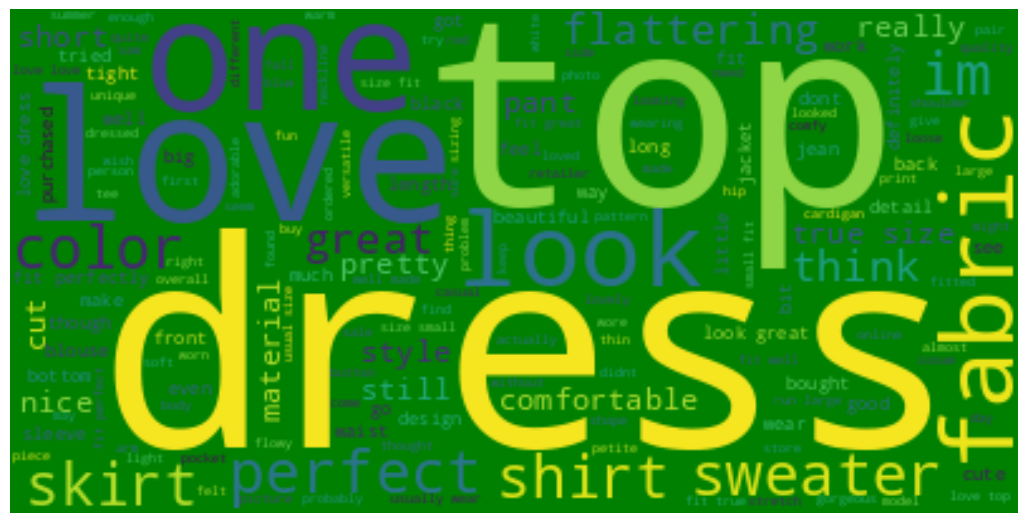

In [ ]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_p, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
worldcloud_n = WordCloud(background_color="red", max_words=200) # The maximum number of words

In [ ]:
worldcloud_n.generate(negative_w)

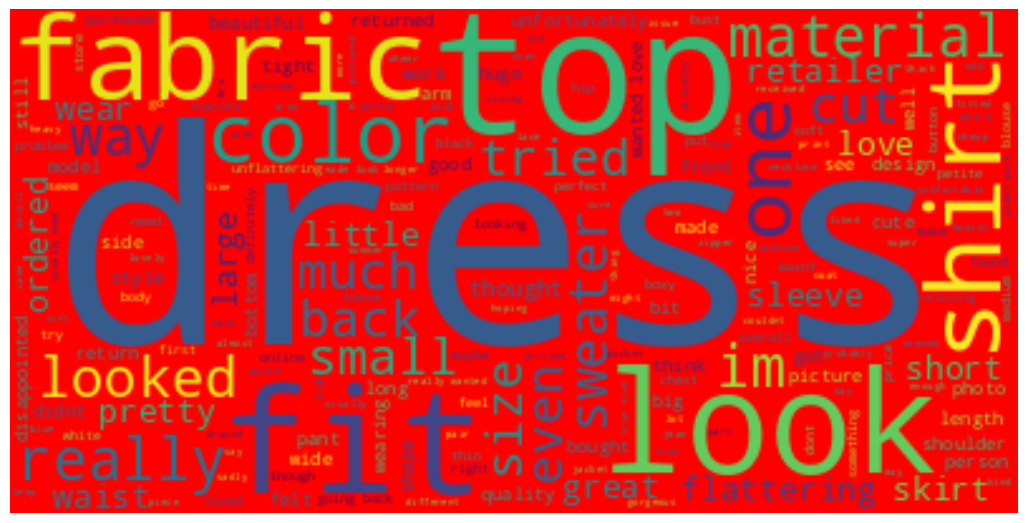

In [ ]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_n, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#search how to get more insights from world clould to improve your models

It can be noticed that there many mutual words which indicates that they might be consider as stopwords.
<br>
Also, we may do further investigation to detect the more frequent words that just where there in 1 class or to consider more words like stopwords like "look"

In [ ]:
# Extract the word frequencies from the existing word cloud
word_frequencies = worldcloud_p.words_

# Create a dataframe from the word frequencies
df_word_frequencies_p = pd.DataFrame(word_frequencies.items(), columns=["Word", "Frequency"])

# Display the top 10
df_word_frequencies_p.iloc[:10,:]


Word  Frequency
0    dress   1.000000
1      top   0.861352
2     love   0.557417
3      one   0.388093
4     look   0.376186
5   fabric   0.364682
6  perfect   0.340262
7  sweater   0.339657
8       im   0.330575
9    color   0.314430

In [ ]:
# Extract the word frequencies from the existing word cloud
word_frequencies = worldcloud_n.words_

# Create a dataframe from the word frequencies
df_word_frequencies_n = pd.DataFrame(word_frequencies.items(), columns=["Word", "Frequency"])

# Display the top 10
df_word_frequencies_n.iloc[:10,:]

Word  Frequency
0     dress   1.000000
1       top   0.831585
2       fit   0.561189
3      look   0.514569
4    fabric   0.499417
5     shirt   0.384033
6     color   0.349650
7       one   0.329254
8  material   0.323427
9    really   0.312937

It seems that dress & top are stopwords since they are the top frequent word in both cateogries
<br>
Therfroe, we will assume that

In [ ]:
# Display the top 3 in the other class
display(df_word_frequencies_n.query("Word == 'love' "))
display(df_word_frequencies_p.query("Word == 'fit' "))

Word  Frequency
26  love   0.212121

Word  Frequency
57  fit   0.144097

Also we cans ee that  "love" which is the top3 in positive word is the 27th most frequent in the negative which suggests  that it is really an important positve word, but which is certianly important negative word is "fit" since it is the top 3 in -ve words and the 58 in the postive words <br>
You can investigare further to determine the important word for each target class

Re do the previous step after considering "dress" & "top" stopwords

In [ ]:
# Define new stopwords
new_stopwords = ['dress', 'top']


stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(new_stopwords)


In [ ]:
cleaning_text = df_copy["text"].apply(cleaning).to_frame()
# aply the cleaning function for each row of the text column
# Then convert the series into dataframe

In [ ]:
df_copy2  = df_copy.copy()
df_copy2['text'] = cleaning_text['text']

In [ ]:
class_positive = df_copy2.query("target == 1")["text"]
class_negative = df_copy2.query("target == 0")["text"]

# This will merge all texts in class positive, and add white space between each observations' texts
positive_w = " ".join(class_positive)
negative_w = " ".join(class_negative)

worldcloud_p = WordCloud(background_color="green", max_words=200) # The maximum number of words
worldcloud_p.generate(positive_w)
worldcloud_n = WordCloud(background_color="red", max_words=200) # The maximum number of words
worldcloud_n.generate(negative_w)



# +ve dataframe ------------------------------------------------------------------
# Extract the word frequencies from the existing word cloud
word_frequencies = worldcloud_p.words_

# Create a dataframe from the word frequencies
df_word_frequencies_p = pd.DataFrame(word_frequencies.items(), columns=["Word", "Frequency"])

# Display the top 10
display(df_word_frequencies_p.iloc[:10,:])


# -ve dataframe ------------------------------------------------------------------
# Extract the word frequencies from the existing word cloud
word_frequencies = worldcloud_n.words_

# Create a dataframe from the word frequencies
df_word_frequencies_n = pd.DataFrame(word_frequencies.items(), columns=["Word", "Frequency"])

# Display the top 10
display(df_word_frequencies_n.iloc[:10,:])




Word  Frequency
0     love   1.000000
1      one   0.561471
2     look   0.547353
3  perfect   0.521765
4  sweater   0.485882
5   fabric   0.482647
6    great   0.461176
7    shirt   0.447059
8       im   0.445588
9    skirt   0.435000

Word  Frequency
0       fit   1.000000
1      look   0.930063
2    fabric   0.918580
3     shirt   0.687891
4     color   0.627349
5       one   0.589770
6  material   0.573069
7    looked   0.549061
8    really   0.530271
9      love   0.519833

You can see that "dress" & "top" are no longer in the worldcloud since we considered them as stiowords

-------------

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Here we use the dataframe wituout any cleaning for the texts
X = df_copy["text"]
y = df_copy["target"]

We will divide the dataset into three sets:
- Training
- Testing
- Validation

The training we hvae full one without the validaiton split for two reasons:
- To make sure our splitting is well
- To use it in ML models

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, stratify=y_train_full, random_state=101)

In [27]:
# training full will be used just in ML
print("Shape of X_train_full:",X_train_full.shape)
print("Shape of y_train_full:",y_train_full.shape)
print()

# training  will be used just in DL
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print()
# validation will be used just in DL
print("Shape of x_val:",X_val.shape)
print("Shape of y_val:",y_val.shape)
print()

# testing will be used in both  ML & DL
print("Shape of x_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)
print()


Shape of X_train_full: (18107,)
Shape of y_train_full: (18107,)

Shape of X_train: (16296,)
Shape of y_train: (16296,)

Shape of x_val: (1811,)
Shape of y_val: (1811,)

Shape of x_test: (4527,)
Shape of y_test: (4527,)



In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(preprocessor=cleaning,
                             max_df=0.95,  # When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
                             min_df=0.05)  # When building the vocabulary ignore terms that have a document frequency strictly less than the given threshold

X_train_count_ml = vectorizer.fit_transform(X_train_full)
X_test_count_ml = vectorizer.transform(X_test)

In [ ]:
# if you want to check
pd.DataFrame(X_train_count_ml.toarray(), columns = vectorizer.get_feature_names_out())

also  arm  back  beautiful  better  big  bit  black  bottom  bought  \
0         0    0     1          0       0    0    0      0       0       1   
1         0    0     1          0       0    0    0      0       0       0   
2         0    0     0          0       0    0    1      0       0       0   
3         0    0     0          0       0    0    1      0       0       0   
4         0    0     0          0       0    0    0      0       0       0   
...     ...  ...   ...        ...     ...  ...  ...    ...     ...     ...   
18102     1    0     0          0       0    0    0      1       0       0   
18103     0    0     0          0       0    0    0      0       0       0   
18104     0    1     0          0       0    0    1      0       0       0   
18105     0    0     1          0       0    0    0      0       0       0   
18106     0    0     0          0       0    0    0      0       0       0   

       color  comfortable  could  cut  cute  definitely  design  detail  \
0          0            0      0    0     0           0       0       0   
1          0            0      0    0     0           0       0       0   
2          0            0      0    0     0           0       0       0   
3          0            0      0    0     1           0       0       0   
4          0            0      0    0     0           0       0       0   
...      ...          ...    ...  ...   ...         ...     ...     ...   
18102      0            1      0    0     0           0       0       0   
18103      1            0      1    0     0           0       0       0   
18104      0            1      0    1     0           0       0       0   
18105      1            0      0    1     0           0       0       0   
18106      0            0      0    0     0           0       0       0   

       didnt  dont  enough  even  fabric  fall  feel  ...  skirt  sleeve  \
0          1     0       1     0       0     0     0  ...      0       0   
1          0     0       0     0       1     0     0  ...      0       0   
2          0     0       0     0       0     0     0  ...      0       0   
3          0     0       0     0       0     0     0  ...      1       0   
4          0     0       0     0       0     0     0  ...      0       0   
...      ...   ...     ...   ...     ...   ...   ...  ...    ...     ...   
18102      0     0       0     0       0     0     0  ...      0       0   
18103      0     1       0     0       0     0     0  ...      0       0   
18104      0     0       0     0       0     1     0  ...      0       0   
18105      0     0       0     1       0     0     1  ...      0       0   
18106      0     1       0     0       0     0     0  ...      0       0   

       small  soft  still  store  style  summer  super  sweater  think  \
0          0     0      0      0      1       0      0        0      0   
1          0     0      0      0      0       0      0        0      0   
2          0     0      0      0      0       0      0        0      0   
3          0     0      0      0      0       0      0        0      0   
4          0     0      0      0      0       0      0        0      0   
...      ...   ...    ...    ...    ...     ...    ...      ...    ...   
18102      0     0      0      0      0       0      0        1      0   
18103      0     0      1      0      0       0      0        0      2   
18104      0     0      0      0      0       0      0        0      0   
18105      1     0      0      0      1       0      0        0      0   
18106      0     0      0      0      0       0      0        0      0   

       though  tight  time  tried  true  usually  waist  way  wear  wearing  \
0           0      0     0      0     0        0      0    1     0        0   
1           0      0     0      0     1        0      0    0     0        1   
2           1      0     0      0     0        0      1    0     0        0   
3           0      0     0      0     1        0   

It is a sparse matrix with just integers

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                             max_df=0.95,  # When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
                             min_df=0.05)  # When building the vocabulary ignore terms that have a document frequency strictly less than the given threshold)
X_train_tf_idf_ml = tf_idf_vectorizer.fit_transform(X_train_full)
X_test_tf_idf_ml = tf_idf_vectorizer.transform(X_test)


In [ ]:
# if you want to check
pd.DataFrame(X_train_tf_idf_ml.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

also       arm      back  beautiful  better  big       bit  \
0      0.000000  0.000000  0.312171        0.0     0.0  0.0  0.000000   
1      0.000000  0.000000  0.248489        0.0     0.0  0.0  0.000000   
2      0.000000  0.000000  0.000000        0.0     0.0  0.0  0.248151   
3      0.000000  0.000000  0.000000        0.0     0.0  0.0  0.268439   
4      0.000000  0.000000  0.000000        0.0     0.0  0.0  0.000000   
...         ...       ...       ...        ...     ...  ...       ...   
18102  0.432076  0.000000  0.000000        0.0     0.0  0.0  0.000000   
18103  0.000000  0.000000  0.000000        0.0     0.0  0.0  0.000000   
18104  0.000000  0.334485  0.000000        0.0     0.0  0.0  0.272186   
18105  0.000000  0.000000  0.224719        0.0     0.0  0.0  0.000000   
18106  0.000000  0.000000  0.000000        0.0     0.0  0.0  0.000000   

          black  bottom    bought     color  comfortable     could       cut  \
0      0.000000     0.0  0.317657  0.000000     0.000000  0.000000  0.000000   
1      0.000000     0.0  0.000000  0.000000     0.000000  0.000000  0.000000   
2      0.000000     0.0  0.000000  0.000000     0.000000  0.000000  0.000000   
3      0.000000     0.0  0.000000  0.000000     0.000000  0.000000  0.000000   
4      0.000000     0.0  0.000000  0.000000     0.000000  0.000000  0.000000   
...         ...     ...       ...       ...          ...       ...       ...   
18102  0.501474     0.0  0.000000  0.000000     0.404734  0.000000  0.000000   
18103  0.000000     0.0  0.000000  0.176678     0.000000  0.270489  0.000000   
18104  0.000000     0.0  0.000000  0.000000     0.258814  0.000000  0.310212   
18105  0.000000     0.0  0.000000  0.170071     0.000000  0.000000  0.264269   
18106  0.000000     0.0  0.000000  0.000000     0.000000  0.000000  0.000000   

          cute  definitely  design  detail     didnt      dont    enough  \
0      0.00000         0.0     0.0     0.0  0.367267  0.000000  0.388523   
1      0.00000         0.0     0.0     0.0  0.000000  0.000000  0.000000   
2      0.00000         0.0     0.0     0.0  0.000000  0.000000  0.000000   
3      0.26102         0.0     0.0     0.0  0.000000  0.000000  0.000000   
4      0.00000         0.0     0.0     0.0  0.000000  0.000000  0.000000   
...        ...         ...     ...     ...       ...       ...       ...   
18102  0.00000         0.0     0.0     0.0  0.000000  0.000000  0.000000   
18103  0.00000         0.0     0.0     0.0  0.000000  0.272037  0.000000   
18104  0.00000         0.0     0.0     0.0  0.000000  0.000000  0.000000   
18105  0.00000         0.0     0.0     0.0  0.000000  0.000000  0.000000   
18106  0.00000         0.0     0.0     0.0  0.000000  0.329271  0.000000   

           even    fabric      fall      feel  ...     skirt  sleeve  \
0      0.000000  0.000000  0.000000  0.000000  ...  0.000000     0.0   
1      0.000000  0.215766  0.000000  0.000000  ...  0.000000     0.0   
2      0.000000  0.000000  0.000000  0.000000  ...  0.000000     0.0   
3      0.000000  0.000000  0.000000  0.000000  ...  0.311664     0.0   
4      0.000000  0.000000  0.000000  0.000000  ...  0.000000     0.0   
...         ...       ...       ...       ...  ...       ...     ...   
18102  0.000000  0.000000  0.000000  0.000000  ...  0.000000     0.0   
18103  0.000000  0.000000  0.000000  0.000000  ...  0.000000     0.0   
18104  0.000000  0.000000  0.332178  0.000000  ...  0.000000     0.0   
18105  0.250074  0.000000  0.000000  0.253732  ...  0.000000     0.0   
18106  0.000000  0.000000  0.000000  0.000000  ...  0.000000     0.0   

          small  soft     still  store     style  summer  super   sweater  \
0      0.000000   0.0  0.000000    0.0  0.369692     0.0    0.0  0.000000   
1      0.000000   0.0  0.000000    0.0  0.000000     0.0    0.0  0.000000   
2      0.000000   0.0  0.000000    0.0  0.000000     0.0    0.0  0.000000   
3      0.000000   0.0  0.000000    0.0  0.000000     0.0    0.0  0.000000   
4      0.0

It is a sparse matrix with floats

### Eval Function

It will be used in ML parts

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Scoring Metric

we want to focus on the -ve review. Therfroe, We defined our scoreing insetead of changing (0 to 1) and (1 to 0)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_negative = make_scorer(f1_score, average=None, labels =[0])
precision_negative = make_scorer(precision_score, average=None, labels =[0])
recall_negative = make_scorer(recall_score,  average=None, labels =[0])
scoring = {"f1_negative":f1_negative,
           "precision_negative":precision_negative,
           "recall_negative":recall_negative}

## Logistic Regression

### CountVectorizer

#### Vanilla Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count_ml, y_train_full)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [ ]:
eval_metric(log, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Test_Set
[[ 660  160]
 [ 908 2799]]
              precision    recall  f1-score   support

           0       0.42      0.80      0.55       820
           1       0.95      0.76      0.84      3707

    accuracy                           0.76      4527
   macro avg       0.68      0.78      0.70      4527
weighted avg       0.85      0.76      0.79      4527


Train_Set
[[ 2587   693]
 [ 3598 11229]]
              precision    recall  f1-score   support

           0       0.42      0.79      0.55      3280
           1       0.94      0.76      0.84     14827

    accuracy                           0.76     18107
   macro avg       0.68      0.77      0.69     18107
weighted avg       0.85      0.76      0.79     18107



#### Cross validation LR

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    log, X_train_count_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    0.054979
score_time                  0.007413
test_f1_negative            0.539424
train_f1_negative           0.547627
test_precision_negative     0.412771
train_precision_negative    0.419100
test_recall_negative        0.778963
train_recall_negative       0.789871
dtype: float64

###  Gridsearch LR

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10,100],  # 100, 1000
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

log = LogisticRegression(random_state=101)

grid_search_LR = GridSearchCV(
    log, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_LR.fit(X_train_count_ml, y_train_full)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, sol

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=101),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
grid_search_LR.best_estimator_

LogisticRegression(C=10, random_state=101, solver='saga')

In [ ]:
eval_metric_LR = eval_metric(grid_search_LR, X_train_count_ml, y_train_full, X_test_count_ml, y_test)
eval_metric_LR

Test_Set
[[ 250  570]
 [ 170 3537]]
              precision    recall  f1-score   support

           0       0.60      0.30      0.40       820
           1       0.86      0.95      0.91      3707

    accuracy                           0.84      4527
   macro avg       0.73      0.63      0.65      4527
weighted avg       0.81      0.84      0.81      4527


Train_Set
[[ 1048  2232]
 [  587 14240]]
              precision    recall  f1-score   support

           0       0.64      0.32      0.43      3280
           1       0.86      0.96      0.91     14827

    accuracy                           0.84     18107
   macro avg       0.75      0.64      0.67     18107
weighted avg       0.82      0.84      0.82     18107



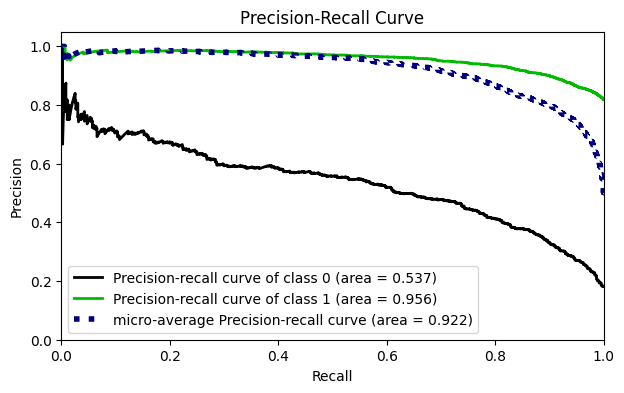

In [ ]:
bfrom scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = grid_search_LR.predict_proba(X_test_count_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = grid_search_LR.predict(X_test_count_ml)

y_pred_proba = grid_search_LR.predict_proba(X_test_count_ml)[:,0]    # 0 (1st column represents class 0)
LR_AP_count = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
LR_count_rec = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
LR_count_f1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

### TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_tf_idf_ml, y_train_full)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [ ]:
eval_metric(log, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Test_Set
[[ 660  160]
 [ 899 2808]]
              precision    recall  f1-score   support

           0       0.42      0.80      0.55       820
           1       0.95      0.76      0.84      3707

    accuracy                           0.77      4527
   macro avg       0.68      0.78      0.70      4527
weighted avg       0.85      0.77      0.79      4527


Train_Set
[[ 2590   690]
 [ 3564 11263]]
              precision    recall  f1-score   support

           0       0.42      0.79      0.55      3280
           1       0.94      0.76      0.84     14827

    accuracy                           0.77     18107
   macro avg       0.68      0.77      0.70     18107
weighted avg       0.85      0.77      0.79     18107



#### Cross validation LR

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    log, X_train_tf_idf_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    0.039137
score_time                  0.007471
test_f1_negative            0.539299
train_f1_negative           0.548683
test_precision_negative     0.413423
train_precision_negative    0.420441
test_recall_negative        0.775915
train_recall_negative       0.789499
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10,100],  # 100, 1000
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

log = LogisticRegression()

grid_search_LR = GridSearchCV(
    log, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_LR.fit(X_train_tf_idf_ml, y_train_full)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
grid_search_LR.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [ ]:
eval_metric_LR = eval_metric(grid_search_LR, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)
eval_metric_LR

Test_Set
[[ 274  546]
 [ 187 3520]]
              precision    recall  f1-score   support

           0       0.59      0.33      0.43       820
           1       0.87      0.95      0.91      3707

    accuracy                           0.84      4527
   macro avg       0.73      0.64      0.67      4527
weighted avg       0.82      0.84      0.82      4527


Train_Set
[[ 1192  2088]
 [  654 14173]]
              precision    recall  f1-score   support

           0       0.65      0.36      0.47      3280
           1       0.87      0.96      0.91     14827

    accuracy                           0.85     18107
   macro avg       0.76      0.66      0.69     18107
weighted avg       0.83      0.85      0.83     18107



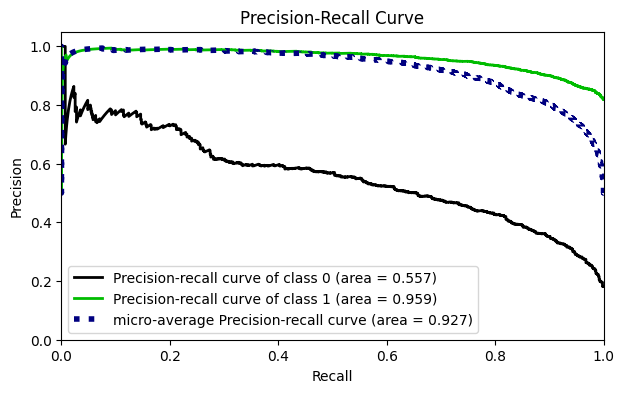

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = grid_search_LR.predict_proba(X_test_tf_idf_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = grid_search_LR.predict(X_test_tf_idf_ml)

y_pred_proba = grid_search_LR.predict_proba(X_test_tf_idf_ml)[:,0]    # 0 (1st column represents class 0)
LR_AP_tf = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
LR_tf_rec = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
LR_tf_f1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

## Naive Bayes

### Countvectorizer

#### Vanilla NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_count_ml, y_train_full)

MultinomialNB()

In [ ]:
eval_metric(nb, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Test_Set
[[ 353  467]
 [ 311 3396]]
              precision    recall  f1-score   support

           0       0.53      0.43      0.48       820
           1       0.88      0.92      0.90      3707

    accuracy                           0.83      4527
   macro avg       0.71      0.67      0.69      4527
weighted avg       0.82      0.83      0.82      4527


Train_Set
[[ 1404  1876]
 [ 1196 13631]]
              precision    recall  f1-score   support

           0       0.54      0.43      0.48      3280
           1       0.88      0.92      0.90     14827

    accuracy                           0.83     18107
   macro avg       0.71      0.67      0.69     18107
weighted avg       0.82      0.83      0.82     18107



#### CV NB

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

nb = MultinomialNB()
scores = cross_validate(
    nb, X_train_count_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    0.005565
score_time                  0.006770
test_f1_negative            0.471325
train_f1_negative           0.479511
test_precision_negative     0.535710
train_precision_negative    0.542973
test_recall_negative        0.421646
train_recall_negative       0.429336
dtype: float64

#### GridSearch NB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define a grid of parameters to search over
param_grid = {
    'alpha': [0.1, 1.0, 5.0, 10.0, 100],
    'fit_prior': [True, False],
}
nb = MultinomialNB()

grid_search_NB = GridSearchCV(
    nb, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_NB.fit(X_train_count_ml, y_train_full)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=1.0, fi

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 5.0, 10.0, 100],
                         'fit_prior': [True, False]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
grid_search_NB.best_params_

{'alpha': 10.0, 'fit_prior': False}

In [ ]:
eval_metric_NB = eval_metric(grid_search_NB, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Test_Set
[[ 636  184]
 [ 909 2798]]
              precision    recall  f1-score   support

           0       0.41      0.78      0.54       820
           1       0.94      0.75      0.84      3707

    accuracy                           0.76      4527
   macro avg       0.67      0.77      0.69      4527
weighted avg       0.84      0.76      0.78      4527


Train_Set
[[ 2533   747]
 [ 3650 11177]]
              precision    recall  f1-score   support

           0       0.41      0.77      0.54      3280
           1       0.94      0.75      0.84     14827

    accuracy                           0.76     18107
   macro avg       0.67      0.76      0.69     18107
weighted avg       0.84      0.76      0.78     18107



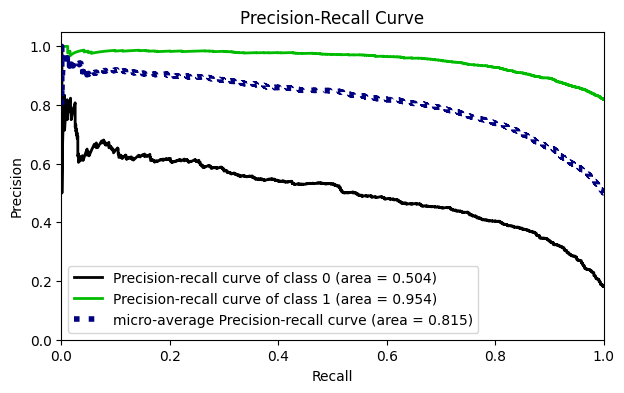

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = grid_search_NB.predict_proba(X_test_count_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = grid_search_NB.predict(X_test_count_ml)

y_pred_proba = grid_search_NB.predict_proba(X_test_count_ml)[:,0]    # 0 (1st column represents class 0)

NB_AP_count = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
NB_count_rec = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
NB_count_f1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

# to check
print(NB_count_f1)


0.5378435517970401


### TF-IDF

#### Vanilla NB TF

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf_ml, y_train_full)

MultinomialNB()

In [ ]:
eval_metric(nb, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Test_Set
[[   8  812]
 [   1 3706]]
              precision    recall  f1-score   support

           0       0.89      0.01      0.02       820
           1       0.82      1.00      0.90      3707

    accuracy                           0.82      4527
   macro avg       0.85      0.50      0.46      4527
weighted avg       0.83      0.82      0.74      4527


Train_Set
[[   30  3250]
 [    8 14819]]
              precision    recall  f1-score   support

           0       0.79      0.01      0.02      3280
           1       0.82      1.00      0.90     14827

    accuracy                           0.82     18107
   macro avg       0.80      0.50      0.46     18107
weighted avg       0.81      0.82      0.74     18107



#### CV NB TF

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

nb = MultinomialNB()
scores = cross_validate(
    nb, X_train_tf_idf_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    0.006590
score_time                  0.007100
test_f1_negative            0.018040
train_f1_negative           0.017422
test_precision_negative     0.854762
train_precision_negative    0.801235
test_recall_negative        0.009146
train_recall_negative       0.008808
dtype: float64

#### GridSearch NB TF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define a grid of parameters to search over
param_grid = {
    'alpha': [0.1, 1.0, 5.0, 10.0, 100],
    'fit_prior': [True, False],
}

nb = MultinomialNB()

grid_search_NB_TF = GridSearchCV(
    nb, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_NB_TF.fit(X_train_tf_idf_ml, y_train_full)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END ..........................alpha=1.0, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=1.0, fi

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 5.0, 10.0, 100],
                         'fit_prior': [True, False]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
grid_search_NB_TF.best_params_

{'alpha': 10.0, 'fit_prior': False}

In [ ]:
eval_metric_NB_TF = eval_metric(grid_search_NB_TF, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Test_Set
[[ 654  166]
 [ 958 2749]]
              precision    recall  f1-score   support

           0       0.41      0.80      0.54       820
           1       0.94      0.74      0.83      3707

    accuracy                           0.75      4527
   macro avg       0.67      0.77      0.68      4527
weighted avg       0.85      0.75      0.78      4527


Train_Set
[[ 2567   713]
 [ 3916 10911]]
              precision    recall  f1-score   support

           0       0.40      0.78      0.53      3280
           1       0.94      0.74      0.82     14827

    accuracy                           0.74     18107
   macro avg       0.67      0.76      0.68     18107
weighted avg       0.84      0.74      0.77     18107



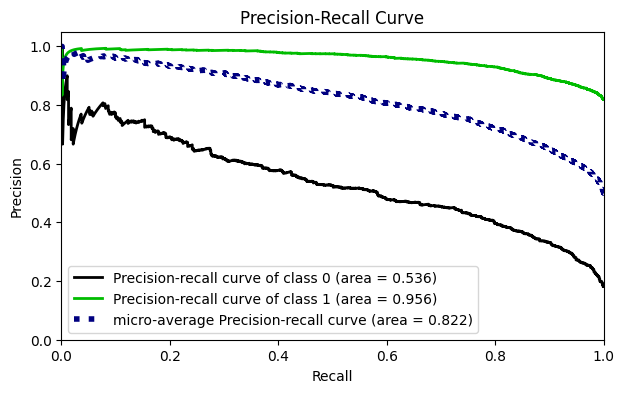

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = grid_search_NB_TF.predict_proba(X_test_tf_idf_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = grid_search_NB_TF.predict(X_test_tf_idf_ml)

y_pred_proba = grid_search_NB_TF.predict_proba(X_test_tf_idf_ml)[:,0]    # 0 (1st column represents class 0)

NB_AP_tf = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
NB_tf_rec = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
NB_tf_f1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

# to check
print(NB_tf_rec)


0.7975609756097561


It is fast, so let's try F1_neg as well

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define a grid of parameters to search over
param_grid = {
    'alpha': [0.1, 0.5,  1.0, 5, 10.0, 100],
    'fit_prior': [True, False],
}

nb = MultinomialNB()

grid_search_NB_TF_F1 = GridSearchCV(
    nb, param_grid, cv=5, scoring=f1_negative, return_train_score=True, verbose=2
)
grid_search_NB_TF_F1.fit(X_train_tf_idf_ml, y_train_full)
eval_metric_NB_TF_F1 = eval_metric(grid_search_NB_TF_F1, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.5, fi

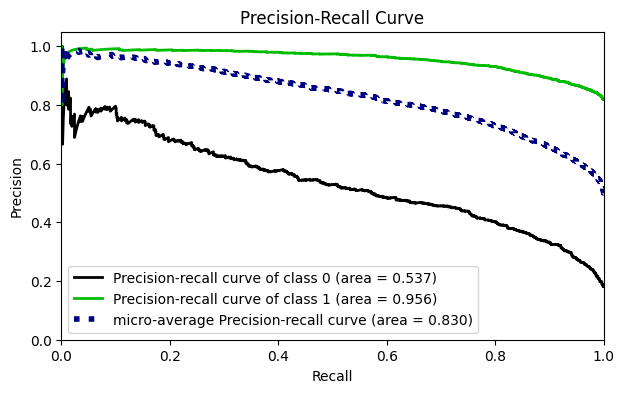

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = grid_search_NB_TF_F1.predict_proba(X_test_tf_idf_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = grid_search_NB_TF_F1.predict(X_test_tf_idf_ml)

y_pred_proba = grid_search_NB_TF_F1.predict_proba(X_test_tf_idf_ml)[:,0]    # 0 (1st column represents class 0)

NB_AP_tf_F1 = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
NB_tf_rec_F1 = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
NB_tf_f1_F1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

# to check
print(NB_tf_rec)


0.7975609756097561


## Support Vector Machine (SVM)

### Countvectorizer

#### Vanilla SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced', random_state=101, probability=True)
svm.fit(X_train_count_ml, y_train_full)
eval_metric(svm, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Test_Set
[[ 582  238]
 [ 664 3043]]
              precision    recall  f1-score   support

           0       0.47      0.71      0.56       820
           1       0.93      0.82      0.87      3707

    accuracy                           0.80      4527
   macro avg       0.70      0.77      0.72      4527
weighted avg       0.84      0.80      0.82      4527


Train_Set
[[ 3109   171]
 [ 1972 12855]]
              precision    recall  f1-score   support

           0       0.61      0.95      0.74      3280
           1       0.99      0.87      0.92     14827

    accuracy                           0.88     18107
   macro avg       0.80      0.91      0.83     18107
weighted avg       0.92      0.88      0.89     18107



####  CV SVM

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    svm, X_train_count_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()


fit_time                    24.667727
score_time                   1.970965
test_f1_negative             0.554408
train_f1_negative            0.746422
test_precision_negative      0.462469
train_precision_negative     0.615554
test_recall_negative         0.692683
train_recall_negative        0.947967
dtype: float64

#### GridSerach SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.005, 0.01, 0.1, 1, 10],
               'gamma': ["scale", "auto", 0.2, 0.3],
               'kernel': ['rbf', 'linear',"poly", "sigmoid"],
               'class_weight': ["balanced"],  #Because the target is unbalanced
               'degree':[2,3,4]
             }

grid_search_SVM = GridSearchCV(
    svm, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_SVM.fit(X_train_count_ml, y_train_full)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=rbf; total time=  31.1s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=rbf; total time=  31.3s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=rbf; total time=  31.3s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=rbf; total time=  31.1s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=rbf; total time=  31.3s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=linear; total time=  23.3s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=linear; total time=  23.2s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=linear; total time=  23.6s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kernel=linear; total time=  23.5s
[CV] END C=0.001, class_weight=balanced, degree=2, gamma=scale, kerne

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=101),
             param_grid={'C': [0.001, 0.005, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced'], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.2, 0.3],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
grid_search_SVM.best_estimator_

SVC(C=0.1, class_weight='balanced', gamma='auto', kernel='poly',
    random_state=101)

In [ ]:
eval_metric_ٍSVM = eval_metric(grid_search_SVM, X_train_count_ml, y_train_full, X_test_count_ml, y_test)
eval_metric_ٍSVM

Test_Set
[[ 820    0]
 [3707    0]]
              precision    recall  f1-score   support

           0       0.18      1.00      0.31       820
           1       0.00      0.00      0.00      3707

    accuracy                           0.18      4527
   macro avg       0.09      0.50      0.15      4527
weighted avg       0.03      0.18      0.06      4527


Train_Set
[[ 3280     0]
 [14827     0]]
              precision    recall  f1-score   support

           0       0.18      1.00      0.31      3280
           1       0.00      0.00      0.00     14827

    accuracy                           0.18     18107
   macro avg       0.09      0.50      0.15     18107
weighted avg       0.03      0.18      0.06     18107



In [ ]:
# to plot it

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1],
               'gamma': ["auto"],
               'kernel': ["poly"],
               'class_weight': ["balanced"],  #Because the target is unbalanced
               'degree':[3]
             }
svm = SVC(class_weight='balanced', random_state=101, probability=True)

grid_search_SVM_extra = GridSearchCV(
    svm, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_SVM_extra.fit(X_train_count_ml, y_train_full)

eval_metric(grid_search_SVM_extra, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=auto, kernel=poly; total time= 2.1min
[CV] END C=0.1, class_weight=balanced, degree=3, gamma=auto, kernel=poly; total time= 2.1min


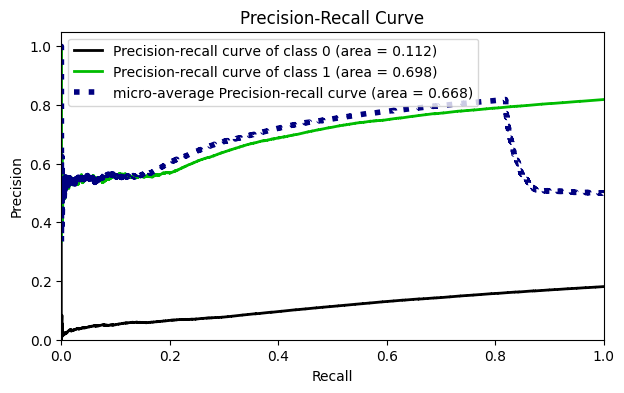

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# Get the predicted probabilities for the test data
y_proba = grid_search_SVM_extra.predict_proba(X_test_count_ml)
plot_precision_recall(y_test, y_proba)
plt.show();

In [ ]:
# These taken manually because it is slow and the kernel was died
SVM_AP_count = 0.112                 # 0 (the 0ve review class)
SVM_count_rec = 1.000                # 0 (the 0ve review class)
SVM_count_f1 =  0.31                 # 0 (the 0ve review class)

### TD-IDF

#### Vainlla SVM TF

In [ ]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced', random_state=101)
svm.fit(X_train_count_ml, y_train_full)
eval_metric(svm, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Test_Set
[[ 775   45]
 [1969 1738]]
              precision    recall  f1-score   support

           0       0.28      0.95      0.43       820
           1       0.97      0.47      0.63      3707

    accuracy                           0.56      4527
   macro avg       0.63      0.71      0.53      4527
weighted avg       0.85      0.56      0.60      4527


Train_Set
[[3133  147]
 [7678 7149]]
              precision    recall  f1-score   support

           0       0.29      0.96      0.44      3280
           1       0.98      0.48      0.65     14827

    accuracy                           0.57     18107
   macro avg       0.63      0.72      0.55     18107
weighted avg       0.85      0.57      0.61     18107



#### CV SVM TF

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    svm, X_train_tf_idf_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()


fit_time                    26.234172
score_time                   1.947867
test_f1_negative             0.557618
train_f1_negative            0.776345
test_precision_negative      0.462503
train_precision_negative     0.647819
test_recall_negative         0.702744
train_recall_negative        0.968496
dtype: float64

#### Grid Search SVM TF

In [ ]:
# since in Count, it takes to much time, we will redcue the number of combinations
# Also, we will use F1 isntead of recall since svm affects was severe on the objective

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1],
               'gamma': ["scale", "auto"],
               'kernel': ['rbf', 'linear',"poly"],
               'degree':[2,3]
             }

grid_search_SVM_TF = GridSearchCV(
    svm, param_grid, cv=5, scoring=f1_negative, return_train_score=True, verbose=2
)
grid_search_SVM_TF.fit(X_train_tf_idf_ml, y_train_full)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=  32.0s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=  32.3s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=  32.0s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=  32.5s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=  32.1s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  26.5s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  26.1s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  26.6s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  26.6s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  26.5s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=  30.9s
[CV] END .........C=0.01, degree=2, gamma=scale

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=101),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
grid_search_SVM_TF.best_estimator_

SVC(C=1, class_weight='balanced', degree=2, random_state=101)

In [ ]:
eval_metric_ٍSVM_TF = eval_metric(grid_search_SVM_TF, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)
eval_metric_ٍSVM_TF

Test_Set
[[ 594  226]
 [ 689 3018]]
              precision    recall  f1-score   support

           0       0.46      0.72      0.56       820
           1       0.93      0.81      0.87      3707

    accuracy                           0.80      4527
   macro avg       0.70      0.77      0.72      4527
weighted avg       0.85      0.80      0.81      4527


Train_Set
[[ 3167   113]
 [ 1771 13056]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      3280
           1       0.99      0.88      0.93     14827

    accuracy                           0.90     18107
   macro avg       0.82      0.92      0.85     18107
weighted avg       0.93      0.90      0.90     18107



In [ ]:
# to plot it

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

svm = SVC(class_weight='balanced', random_state=101, probability = True )


param_grid = {'C': [1],
               'gamma': ["auto"],
               'kernel': ["rbf"],
               'class_weight': ["balanced"],  #Because the target is unbalanced
             }

grid_search_SVM_extra_TF = GridSearchCV(
    svm, param_grid, cv=5, scoring=recall_negative, return_train_score=True, verbose=2
)
grid_search_SVM_extra_TF.fit(X_train_tf_idf_ml, y_train_full)

eval_metric(grid_search_SVM_extra_TF, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time= 1.9min
Test_Set
[[ 678  142]
 [ 984 2723]]
              precision    recall  f1-score   support

           0       0.41      0.83      0.55       820
           1       0.95      0.73      0.83      3707

    accuracy                           0.75      4527
   macro avg       0.68      0.78      0.69      4527
weighted avg       0.85      0.75      0.78      4527


Train_Set
[[ 2634   646]
 [ 3914 10913]]
              precision    recall  f1-score   support

           0       0.40      0.80      0.54      3280
           1       0.9

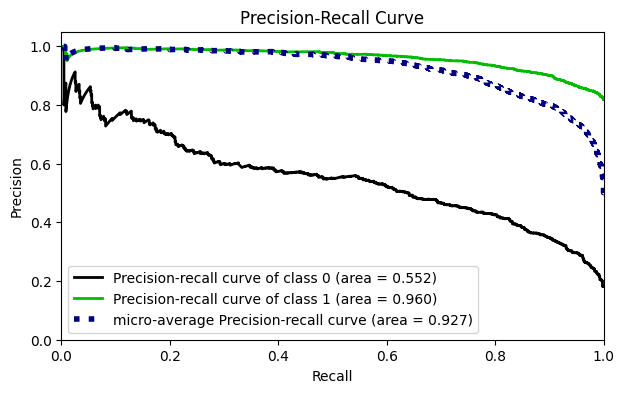

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# Get the predicted probabilities for the test data
y_proba = grid_search_SVM_extra_TF.predict_proba(X_test_tf_idf_ml)
plot_precision_recall(y_test, y_proba)
plt.show();

In [ ]:
# These taken manually because it is slow and the kernel was died
SVM_AP_tf = 0.552                # 0 (the 0ve review class)
SVM_tf_rec = 0.83               # 0 (the 0ve review class)
SVM_tf_f1 =  0.55                # 0 (the 0ve review class)

## Random Forest (RF)

### Countvectorizer

#### Vanilla RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=101, class_weight="balanced")
RF.fit(X_train_count_ml, y_train_full)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(RF, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Test_Set
[[ 155  665]
 [  97 3610]]
              precision    recall  f1-score   support

           0       0.62      0.19      0.29       820
           1       0.84      0.97      0.90      3707

    accuracy                           0.83      4527
   macro avg       0.73      0.58      0.60      4527
weighted avg       0.80      0.83      0.79      4527


Train_Set
[[ 3270    10]
 [   16 14811]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14827

    accuracy                           1.00     18107
   macro avg       1.00      1.00      1.00     18107
weighted avg       1.00      1.00      1.00     18107



#### CV RF

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    RF, X_train_count_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    17.872801
score_time                   0.057044
test_f1_negative             0.310558
train_f1_negative            0.996129
test_precision_negative      0.651874
train_precision_negative     0.994297
test_recall_negative         0.204573
train_recall_negative        0.997967
dtype: float64

#### Grid Search RF

In [ ]:
# start with these, if the best result is on the edge, we may investigate more on that area

param_grid = {'n_estimators':[50, 64, 128, 100, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.2, 0.5, 0.8, 1]
             }

In [ ]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

RF_model_grid = GridSearchCV(estimator=RF_model,
                             param_grid = param_grid,
                             scoring=recall_negative,
                             n_jobs = -1,
                             verbose=2)
RF_model_grid.fit(X_train_count_ml, y_train_full)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 4, 'sqrt'],
                         'max_samples': [0.2, 0.5, 0.8, 1],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 64, 128, 100, 200]},
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
RF_model_grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=4,
                       max_samples=0.5, min_samples_leaf=2, n_estimators=128,
                       random_state=101)

In [ ]:
eval_metric_RF = eval_metric(RF_model_grid, X_train_count_ml, y_train_full, X_test_count_ml, y_test)
eval_metric_RF

Test_Set
[[ 676  144]
 [1249 2458]]
              precision    recall  f1-score   support

           0       0.35      0.82      0.49       820
           1       0.94      0.66      0.78      3707

    accuracy                           0.69      4527
   macro avg       0.65      0.74      0.64      4527
weighted avg       0.84      0.69      0.73      4527


Train_Set
[[2686  594]
 [4909 9918]]
              precision    recall  f1-score   support

           0       0.35      0.82      0.49      3280
           1       0.94      0.67      0.78     14827

    accuracy                           0.70     18107
   macro avg       0.65      0.74      0.64     18107
weighted avg       0.84      0.70      0.73     18107



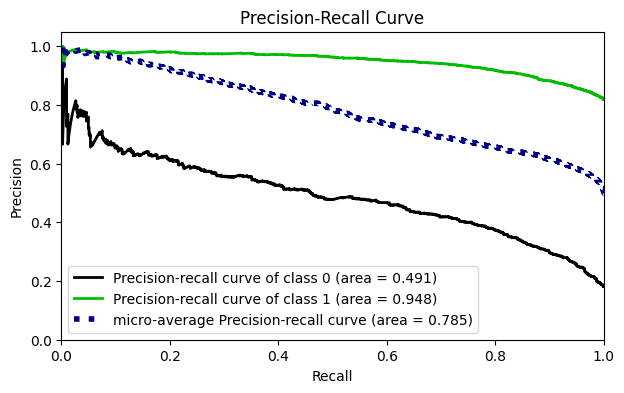

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


y_pred_proba = RF_model_grid.predict_proba(X_test_count_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
# becuase I did not save them and refresh the page, so manually is easier since the fitting will take time
rf_AP_count = 0.491                # 0 (the 0ve review class)
rf_count_rec = 0.82              # 0 (the 0ve review class)
rf_count_f1 =  0.49                 # 0 (the 0ve review class)

### TF-IDF

#### Vanilla RF TF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=101, class_weight="balanced")
RF.fit(X_train_tf_idf_ml, y_train_full)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(RF, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)bm

Test_Set
[[ 156  664]
 [  94 3613]]
              precision    recall  f1-score   support

           0       0.62      0.19      0.29       820
           1       0.84      0.97      0.91      3707

    accuracy                           0.83      4527
   macro avg       0.73      0.58      0.60      4527
weighted avg       0.80      0.83      0.79      4527


Train_Set
[[ 3270    10]
 [   16 14811]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14827

    accuracy                           1.00     18107
   macro avg       1.00      1.00      1.00     18107
weighted avg       1.00      1.00      1.00     18107



#### CV RF TF

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    RF, X_train_tf_idf_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    23.448443
score_time                   0.057025
test_f1_negative             0.325616
train_f1_negative            0.996178
test_precision_negative      0.670415
train_precision_negative     0.994565
test_recall_negative         0.215854
train_recall_negative        0.997798
dtype: float64

#### Grid Search RF TF

In [ ]:
# start with these, if the best result is on the edge, we may investigate more on that area

param_grid = {'n_estimators':[50, 64, 128, 100, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.2, 0.5, 0.8, 1]
             }

In [ ]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

RF_model_grid_tf = GridSearchCV(estimator=RF_model,
                             param_grid = param_grid,
                             scoring=recall_negative,
                             n_jobs = -1,
                             verbose=2)
RF_model_grid_tf.fit(X_train_tf_idf_ml, y_train_full)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 4, 'sqrt'],
                         'max_samples': [0.2, 0.5, 0.8, 1],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 64, 128, 100, 200]},
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
RF_model_grid_tf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=4,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=128,
                       random_state=101)

In [ ]:
eval_metric_RF_TF = eval_metric(RF_model_grid_tf, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)
eval_metric_RF_TF

Test_Set
[[ 682  138]
 [1238 2469]]
              precision    recall  f1-score   support

           0       0.36      0.83      0.50       820
           1       0.95      0.67      0.78      3707

    accuracy                           0.70      4527
   macro avg       0.65      0.75      0.64      4527
weighted avg       0.84      0.70      0.73      4527


Train_Set
[[2691  589]
 [4931 9896]]
              precision    recall  f1-score   support

           0       0.35      0.82      0.49      3280
           1       0.94      0.67      0.78     14827

    accuracy                           0.70     18107
   macro avg       0.65      0.74      0.64     18107
weighted avg       0.84      0.70      0.73     18107



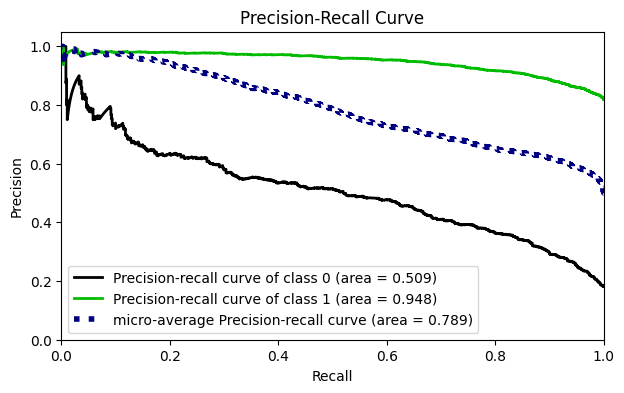

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


y_pred_proba = RF_model_grid_tf.predict_proba(X_test_tf_idf_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
# becuase I did not save them and refresh the page, so manually is easier since the fitting will take time
rf_AP_tfidf = 0.509                # 0 (the 0ve review class)
rf_tfidf_rec = 0.83              # 0 (the 0ve review class)
rf_tfidf_f1 =  0.50                 # 0 (the 0ve review class)

## Ada Boosting
AdaBoost: A bossting that uses weak learners (suaulyly decision trees). It change weights (more weights for what classified wrong)
### Countvectorizer

#### Vanilla AdaB

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 101)
ada.fit(X_train_count_ml, y_train_full)
eval_metric(ada, X_train_count_ml, y_train_full, X_test_count_ml, y_test)

Test_Set
[[ 245  575]
 [ 193 3514]]
              precision    recall  f1-score   support

           0       0.56      0.30      0.39       820
           1       0.86      0.95      0.90      3707

    accuracy                           0.83      4527
   macro avg       0.71      0.62      0.65      4527
weighted avg       0.81      0.83      0.81      4527


Train_Set
[[ 1115  2165]
 [  628 14199]]
              precision    recall  f1-score   support

           0       0.64      0.34      0.44      3280
           1       0.87      0.96      0.91     14827

    accuracy                           0.85     18107
   macro avg       0.75      0.65      0.68     18107
weighted avg       0.83      0.85      0.83     18107



#### CV AdaB

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    ada, X_train_count_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    8.928851
score_time                  0.489004
test_f1_negative            0.414825
train_f1_negative           0.444976
test_precision_negative     0.595287
train_precision_negative    0.636936
test_recall_negative        0.318902
train_recall_negative       0.341938
dtype: float64

#### Grid Serach AdaB

In [ ]:
# start with these, if the best result is on the edge, we may investigate more on that area

param_grid = {'n_estimators':[10, 50, 100, 500],
             'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

ada = AdaBoostClassifier(random_state=101)

ada_model_grid = GridSearchCV(estimator=ada,
                             param_grid = param_grid,
                             scoring=recall_negative,
                             n_jobs = -1,
                             verbose=2)
ada_model_grid.fit(X_train_count_ml, y_train_full)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=AdaBoostClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
ada_model_grid.best_estimator_

AdaBoostClassifier(n_estimators=500, random_state=101)

In [ ]:
eval_metric_ada = eval_metric(ada_model_grid, X_train_count_ml, y_train_full, X_test_count_ml, y_test)
eval_metric_ada

Test_Set
[[ 245  575]
 [ 193 3514]]
              precision    recall  f1-score   support

           0       0.56      0.30      0.39       820
           1       0.86      0.95      0.90      3707

    accuracy                           0.83      4527
   macro avg       0.71      0.62      0.65      4527
weighted avg       0.81      0.83      0.81      4527


Train_Set
[[ 1115  2165]
 [  628 14199]]
              precision    recall  f1-score   support

           0       0.64      0.34      0.44      3280
           1       0.87      0.96      0.91     14827

    accuracy                           0.85     18107
   macro avg       0.75      0.65      0.68     18107
weighted avg       0.83      0.85      0.83     18107



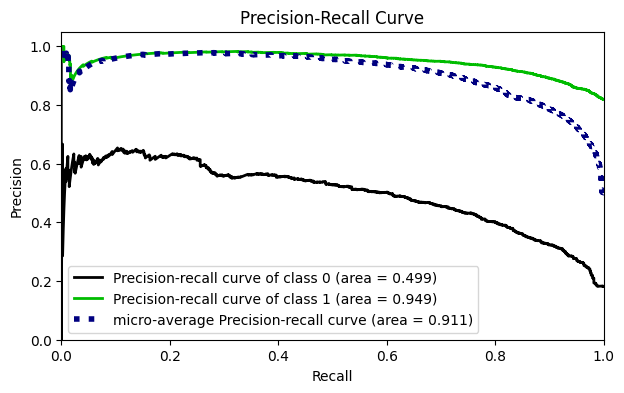

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


y_pred_proba = ada_model_grid.predict_proba(X_test_count_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba

array([[0.49849166, 0.50150834],
       [0.49887379, 0.50112621],
       [0.49947075, 0.50052925],
       ...,
       [0.49966861, 0.50033139],
       [0.49872776, 0.50127224],
       [0.4982597 , 0.5017403 ]])

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = ada_model_grid.predict(X_test_count_ml)

y_pred_proba = ada_model_grid.predict_proba(X_test_count_ml)[:,0]          # 0 (1st column represents class 0)
ada_AP_count = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
ada_count_rec = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
ada_count_f1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

In [ ]:
#Check
ada_AP_count

0.4992566386153093

### TF-IDF

#### Vanilla AdaB

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 101)
ada.fit(X_train_tf_idf_ml, y_train_full)
eval_metric(ada, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)

Test_Set
[[ 294  526]
 [ 256 3451]]
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       820
           1       0.87      0.93      0.90      3707

    accuracy                           0.83      4527
   macro avg       0.70      0.64      0.66      4527
weighted avg       0.81      0.83      0.81      4527


Train_Set
[[ 1450  1830]
 [  692 14135]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      3280
           1       0.89      0.95      0.92     14827

    accuracy                           0.86     18107
   macro avg       0.78      0.70      0.73     18107
weighted avg       0.85      0.86      0.85     18107



#### CV AdaB TF

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    ada, X_train_tf_idf_ml, y_train_full, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    41.250138
score_time                   0.470943
test_f1_negative             0.444152
train_f1_negative            0.543910
test_precision_negative      0.565213
train_precision_negative     0.685132
test_recall_negative         0.366463
train_recall_negative        0.450982
dtype: float64

#### Grid Serach AdaB TF

In [ ]:
# start with these, if the best result is on the edge, we may investigate more on that area

param_grid = {'n_estimators':[10, 50, 100, 500],
             'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

ada = AdaBoostClassifier(random_state=101)

ada_model_grid_TF = GridSearchCV(estimator=ada,
                             param_grid = param_grid,
                             scoring=recall_negative,
                             n_jobs = -1,
                             verbose=2)
ada_model_grid_TF.fit(X_train_tf_idf_ml, y_train_full)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=AdaBoostClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=2)

In [ ]:
ada_model_grid_TF.best_estimator_

AdaBoostClassifier(n_estimators=500, random_state=101)

In [ ]:
eval_metric_ada_tf = eval_metric(ada_model_grid_TF, X_train_tf_idf_ml, y_train_full, X_test_tf_idf_ml, y_test)
eval_metric_ada_tf

Test_Set
[[ 294  526]
 [ 256 3451]]
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       820
           1       0.87      0.93      0.90      3707

    accuracy                           0.83      4527
   macro avg       0.70      0.64      0.66      4527
weighted avg       0.81      0.83      0.81      4527


Train_Set
[[ 1450  1830]
 [  692 14135]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      3280
           1       0.89      0.95      0.92     14827

    accuracy                           0.86     18107
   macro avg       0.78      0.70      0.73     18107
weighted avg       0.85      0.86      0.85     18107



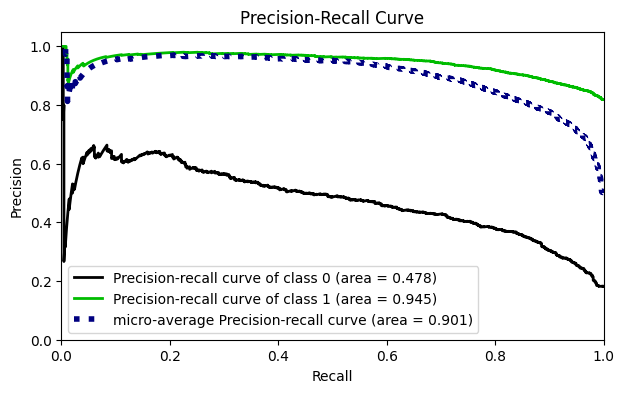

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


y_pred_proba = ada_model_grid_TF.predict_proba(X_test_tf_idf_ml)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred = ada_model_grid_TF.predict(X_test_tf_idf_ml)

y_pred_proba = ada_model_grid_TF.predict_proba(X_test_tf_idf_ml)[:,0]    # 0 (1st column represents class 0)
ada_AP_tf = average_precision_score(y_test, y_pred_proba, pos_label=0)  # 0 (the 0ve review class)
ada_tf_rec = recall_score(y_test, y_pred, pos_label=0)                   # 0 (the 0ve review class)
ada_tf_f1 = f1_score(y_test,y_pred, pos_label=0)                         # 0 (the 0ve review class)

In [ ]:
# Check
ada_AP_tf

0.4778995403779117

## DL modeling

In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import nltk
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# the uncleaned
df_copy

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                           Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2      I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                              I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                          This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
23481                                                                                                                                                                                                                                                                                                                                                                                   I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482                                                                                                                                                                                                                                                                                      It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to 

### Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
num_words = 10001 # we add 1.

tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890', lower=True )
# jUST USE THE Most 10,000 frequent word in curpos
# The Tokenizer function separates all texts into word tokens.

# The num_words hyperparameter indicates that only the first 10,000 words (tokens) that occur most frequently in the corpus will be converted to their
# numeric versions during the tokenization process, while ignoring the other tokens.

# The filters hyperparameter allows us to customize the cleaning operations such as removing numbers & punctuations
# lower=True by default

**I will fit the tokenixaiton Just on trianing set to avoid data leakage.**
<br><br>
**However, some people say thay by toeknize all our corpus we don't do a data leakage since we just expand our vocabulary and not model**
<br><br>
To be in the safe side, I'll do it just for the training


In [ ]:
tokenizer.fit_on_texts(X_train)

# fit_on_texts first tokenizes the texts in the corpus and then identifies all unique tokens and assigns them numbers based on their frequency of use.

# The most frequently used token is assigned the number 1.

# Since we have defined num_words=10001, during the conversion process, only the tokens that have numbers between 1 and 10000 will be used, and the others
# will be ignored.

# To be able to see the ranking of the frequency of use of these tokens, we will need to use the word_index function as shown below.

### Creating word index

In [ ]:
tokenizer.word_index
# word_index sorts the tokens in the corpus according to their usage frequency.

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'me': 30,
 'as': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'just': 38,
 'am': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'fabric': 43,
 'at': 44,
 'up': 45,
 'small': 46,
 'color': 47,
 "'": 48,
 'look': 49,
 'if': 50,
 'more': 51,
 'really': 52,
 'ordered': 53,
 'little': 54,
 'perfect': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'these': 59,
 'out': 60,
 'well': 61,
 'soft': 62,
 'an': 63,
 'back': 64,
 'had': 65,
 'because': 66,
 'can': 67,
 'comfortable': 68,
 '\r': 69,
 'cute': 70,
 'nice': 71,
 'bought': 72,
 'than': 73,
 'beautiful': 74,
 'all': 75,
 'shirt': 76,
 'when': 77,
 'looks': 78,
 'bit': 79,
 '

In [ ]:
tokenizer.word_counts

OrderedDict([('i', 42671),
             ('bought', 2168),
             ('this', 18649),
             ('shirt', 2093),
             ('yesterday', 93),
             ('for', 10174),
             ('off', 1060),
             ('the', 54728),
             ('sale', 963),
             ('price', 927),
             ('usually', 1438),
             ('wear', 4664),
             ('a', 31100),
             ('m', 588),
             ('store', 1430),
             ('only', 1349),
             ('had', 2320),
             ('s', 845),
             ('and', 35429),
             ("didn't", 1278),
             ('want', 676),
             ('to', 17726),
             ('pay', 79),
             ('shipping', 46),
             ('so', 8705),
             ('smaller', 467),
             ('size', 6404),
             ('it', 30906),
             ('was', 8844),
             ('loose', 824),
             ('through', 767),
             ('body', 856),
             ('tight', 1038),
             ('in', 14862),
             ('arms'

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X_train)
X_num_tokens_val = tokenizer.texts_to_sequences(X_val)
X_num_tokens_test = tokenizer.texts_to_sequences(X_test)

# The function "texts_to_sequences" converts all tokens in each document/row of our data into numbers according to their usage frequency in the
# word_index (since num_words=10001, only the first 10000 most frequently used tokens will be used).



# Remember that these conversions are made according to the first 10,000 most frequently occurring tokens in the corpus.
#If a word token was the 10,001st or a larger numbered token, it would be ignored during the conversion

Check

In [ ]:
X_val.iloc[1]   # iloc becuase after splitting , there is shuffling which may produce a different sentence (order has been changed) you can do reset

'I was not impressed upon first taking it out of the package, it was a wrinkled mess,lighter weight than i imagined and i felt like it hung like a potato sack. however after i gave it a good ironing and used the inside back tie to sinch in the waist i was in love. it draped beautiful, the blue has beautiful embroidered detail and i love the full length sleeves that can be rolled. i feel iike i will use for many seasons.'

In [ ]:
print(X_num_tokens_val[1])

[2, 15, 19, 1455, 1051, 172, 1103, 5, 60, 13, 1, 1070, 5, 15, 4, 1167, 1692, 842, 226, 73, 2, 2175, 3, 2, 266, 28, 5, 752, 28, 4, 2291, 865, 147, 198, 2, 647, 5, 4, 112, 1650, 3, 636, 1, 666, 64, 431, 8, 9, 1, 94, 2, 15, 9, 21, 5, 1635, 74, 1, 162, 89, 74, 1020, 257, 3, 2, 21, 1, 305, 87, 141, 20, 67, 29, 1126, 2, 146, 2, 56, 529, 12, 189, 817]


you can see that "i" is really was assigned with number "2" in the `tokenizer.word_counts`

In [ ]:
X_train.iloc[0]   # iloc becuase after splitting , there is shuffling whivh may produce a different sentence (order has been changed) you can do reset

"I bought this shirt yesterday for 30% off the sale price. i usually wear a m. the store only had s and i didn't want to pay for shipping, so i bought the smaller size. it was loose through the body, tight in the arms. you could size down if you need to. but if you have large arms, i would get your normal size or get one larger. the arm fabric does not have much give. the shirt dips low in the front and back, so it has ample coverage for your mid section. it also would accommodate just about any"

In [ ]:
print(X_num_tokens[0])

[2, 72, 7, 76, 872, 12, 148, 1, 157, 161, 2, 108, 32, 4, 249, 1, 109, 118, 65, 176, 3, 2, 127, 219, 8, 959, 12, 1335, 16, 2, 72, 1, 295, 22, 5, 15, 180, 194, 1, 173, 151, 9, 1, 197, 40, 122, 22, 82, 50, 40, 203, 8, 10, 50, 40, 24, 81, 197, 2, 41, 113, 170, 369, 22, 37, 113, 57, 337, 1, 390, 43, 145, 19, 24, 85, 314, 1, 76, 2330, 289, 9, 1, 158, 3, 64, 16, 5, 89, 2019, 807, 12, 170, 620, 960, 5, 88, 41, 1623, 38, 110, 247]


### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens[0])
# The 0th user query consists of: xxx tokens.

101

In [ ]:
len(X_num_tokens[1])
# The 10th user query consists of: xxx tokens.

40

The number of tokens as input should be the same
<br>
Here each text has different length (tokens)
each token will be converted into a vecotr
<br>
You will see the strategy below


In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

# Firstly, we assign the sizes of all the lines/documnets in the corpus to the variable num_tokens by putting them into a list.

# Since aggregation functions can be applied to arrays in a practical way, we convert the list to an array.

In [ ]:
num_tokens

# These are alighned with X_train.iloc[0]  not  X_train.loc[0] or X_train.loc[0]

array([101,  40,  53, ..., 101,  33,  93])

In [ ]:
num_tokens.mean()

# We are taking the average of all lines dimensions.

# Can we fix all comments to this number? Or should we choose another number?

59.928510063819346

In [ ]:
num_tokens.max()
# We see that the longest line/document consisted of 35 tokens.

# We need to fix all rows/documents in our corpus to the same size. In fact, it is recommended to fix all documents to 35, which is the length of the longest
# document, to prevent information/token loss in the documents. However, This will come back to us as a computational cost. (Since the rows/documents are not
# too long in our data, you can fix all of them to the size of the longest comment. But what to do in data with very long lines will be shown below with
# an example.)

# If you have very powerful machines, of course, it is most sensible to fix all documents according to the size of the longest document.

# However, if our machines are not powerful, we need to fix rows/documents at smaller sizes. When deciding this, we can determine the number in such a way
# that there will be no information/token loss at rates of 95% and above (or, a token/information loss of 5% or less) in the documents in our corpus.

114

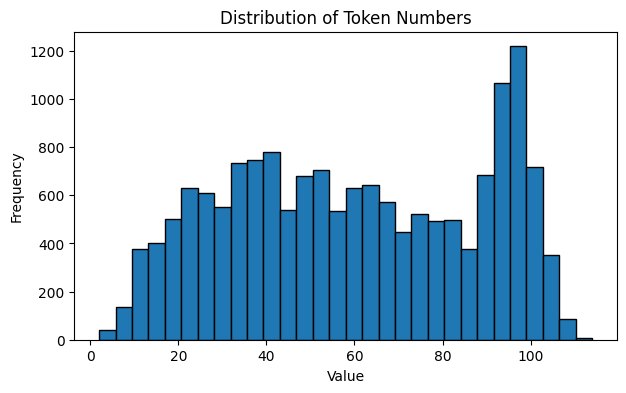

In [ ]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_tokens = 101
sum(num_tokens <= max_tokens) / len(num_tokens)

# In the above example, as we do here, we establish the same equation. And the ratio will be above 95% for which value of max_tokens?

# We are manually ensuring the control of this. By setting it at 101 tokens, I observed that there would be no information/token loss in 95.90% of the
# dokuments in my corpus. Therefore, I will continue with max_tokens  101.

0.9590083456062838

In [ ]:
print("Number of reviews without losing an informaiton:", sum(num_tokens <= max_tokens))
print("Number of reviews WITH losing an informaiton:", len(num_tokens) - sum(num_tokens <= max_tokens))

Number of reviews without losing an informaiton: 15628
Number of reviews WITH losing an informaiton: 668


### Fixing token counts of all documents (pad_sequences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")
X_pad_val = pad_sequences(X_num_tokens_val, maxlen=max_tokens, padding="pre")
X_pad_test = pad_sequences(X_num_tokens_test, maxlen=max_tokens, padding="pre")


# padding="pre", paddings and truncating are performed from the beginning.    # it is prefered since usaully the useful infroamtion is at the end


# The numeric versions of the documents and the length to be fixed (maxlength) are given into the pad_sequences function, and all ducuments are fixed to
# 101 tokens.

# This process is called padding. However, don't let the name mislead you; not only the filling process is performed in this operation, but also the truncating
# process.

# Documents with fewer than 101 tokens are padded with 0's to be added at the beginning of the document.
## For example, a document consisting of 10 tokens is  filled with an additional 91 0's at the beginning to be fixed to 101 tokens. (if padding="pre")

# Documents with more than 101 tokens have their tokens clipped from the beginning of the document. 
##F or example, a document consisting of 131 tokens has its
# first 30 tokens clipped from the beginning to be fixed to 21 tokens. (if padding="pre")

# No addition or clipping is made to a document consisting of 101 tokens. It is left as is.

# This will be applied for the three sets: training, testing, validation

Check

In [ ]:
print(X_num_tokens[-2])

[2, 21, 7, 572, 33, 276, 68, 3, 80, 134, 8, 22, 40, 67, 18, 5, 45, 37, 82, 696, 11, 1, 1110, 311, 182, 2, 32, 5, 2, 113, 3118, 13, 209]


In [ ]:
X_pad[-2]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    2,   21,    7,  572,   33,  276,   68,    3,   80,
        134,    8,   22,   40,   67,   18,    5,   45,   37,   82,  696,
         11,    1, 1110,  311,  182,    2,   32,    5,    2,  113, 3118,
         13,  209])

Becuase the length is < 101, and the padding mode is "pre", you can see the added 0's

### Train Set Split

In [ ]:
# no need because the activation function is sigmoid not softmax  (biarcicaton probelm)


# from tensorflow.keras.utils import to_categorical

# y_test = to_categorical(y_test, 2)
# y_train = to_categorical(y_train, 2)
# y_val = to_categorical(y_val, 2)

In [ ]:
y_train[0]

1

### Modeling

We will build a GRU and a LSTM models

#### GRU

In [ ]:
from tensorflow.keras import Sequential
model_GRU = Sequential()

# This function represents a model where layers follow each other sequentially, meaning the outputs of one layer are fed into the next layer.
# The Sequential model includes the layers that receive inputs from the previous layer.
# Layers are added to the Sequential model using the add method.

In [ ]:
embedding_size = 50

# We specify the dimensionality/size of each vector for the tokens that we will provide to the DL model.

# Although best practice usually prefers numbers like 50, 100, 300, you can choose any number you want.
# However, the larger this number is, the higher # the computational cost will be for us.

**Recommended Neuron Number in RNN Models:**

**Decreasing number of neurons:** More neurons are used in the first LSTM&GRU layer and the number of neurons is reduced in each subsequent layer. This approach allows more features to be learned in earlier layers and fewer features to be learned in later layers.

As a best practice, the recommended number of neurons for the first layer is the same as the size of the word embedding we give to the model. If the word embedding consists of 50 elements, the number of neurons in the first layer should start with 50 and decrease gradually. However, you need to experiment to determine which neuron number gives you the best result.

In [ ]:
model_GRU.add(Embedding(input_dim=num_words,            # token size (vocabulary)
                    output_dim=embedding_size,      # the vector of each token
                    input_length=max_tokens))       # the maximum number of token per wotd

# The Embedding layer is a layer used in NLP models and consists of a 3-dimensional tensor.
# The first dimension is the total number of tokens in the training set.
# The second dimension is how many tokens each document consists of (max_tokens).
# The third dimension is how many elements a word embedding for each token consists of (embedding_size).

# When converting documents to a numeric version, since the first 10,000 tokens most frequently used in the corpus are used, we make the
# input_dim=num_words adjustment to the Embedding layer so that only the first 10,000 tokens most frequently used in the corpus are used in both training and
# prediction stages.

# If you make the input_dim smaller than 10,000 (like 5,000), then the model trains and predicts using only the first 5,000 tokens most frequently
# used in the corpus.

model_GRU.add(Dropout(0.3))

model_GRU.add(GRU(units=60, return_sequences=True)) # the number of units should be logical with the max_tokens

# return_sequences=False makes the model transfer only the last time step's (t_n) hidden_state to the next layer. The default is False.

# return_sequences=True makes the model transfer all hidden_states from all time steps (like t_0, t_1, t_2 .....t_n) to the next LSTM, GRU layers.
# This way, the model tries to keep the entire sentence in mind. If an LSTM/GRU layer is followed by another LSTM/GRU layer, return_sequences should be set
# to True, otherwise the model will return an error. However, if the next layer is a dense layer, return_sequences should be set to False, otherwise
# the model will again return an error. This is because Dense layers only work with a single hidden_state.

model_GRU.add(GRU(units=40, return_sequences=True))
model_GRU.add(Dropout(0.3))
# We set return_sequences=True because the next layer is a GRU layer.

model_GRU.add(GRU(units=25, return_sequences=False))
# We set return_sequences=False because the next layer is a Dense layer.


model_GRU.add(Dense(1, activation='sigmoid'))  # There are 2 classes, so sigmoid is the best activation function

We used decreasing number of neurons approach

In [ ]:
optimizer = Adam()

In [ ]:
from tensorflow.keras.metrics import Recall

In [ ]:
model_GRU.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=Recall(class_id=0))

# The compile is where we adjust the optimization parameters. Compile parameters include the choice of gradient descent algorithm to be used in
# the optimization processes of the DL model, the determination of the loss function, and the metrics to be followed during optimization processes.
# The details are as follows.

# loss: The loss function to be used for optimizing the model. For example, for classification: binary_crossentropy or categorical_crossentropy,
# for regression: mse, etc.
# optimizer: The optimization algorithm to be used to optimize the model's weights. For example, SGD, Adam, or RMSprop, etc.
# metrics: The metrics to be used to evaluate the model's performance. For example, accuracy, precision, or recall, etc.

In [ ]:
model_GRU.summary()
# embedding_size * num_words ==> 50 * 10001 ==> 500050

# 3 x (n2 + nm + 2n) m= input, n= output


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 101, 50)           500050    
                                                                 
 dropout_19 (Dropout)        (None, 101, 50)           0         
                                                                 
 gru_12 (GRU)                (None, 101, 60)           20160     
                                                                 
 gru_13 (GRU)                (None, 101, 40)           12240     
                                                                 
 dropout_20 (Dropout)        (None, 101, 40)           0         
                                                                 
 gru_14 (GRU)                (None, 25)                5025      
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1,
                           patience = 3, restore_best_weights=True)


In [ ]:
# since the data are imbalance

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061151, 2.7601626 ])

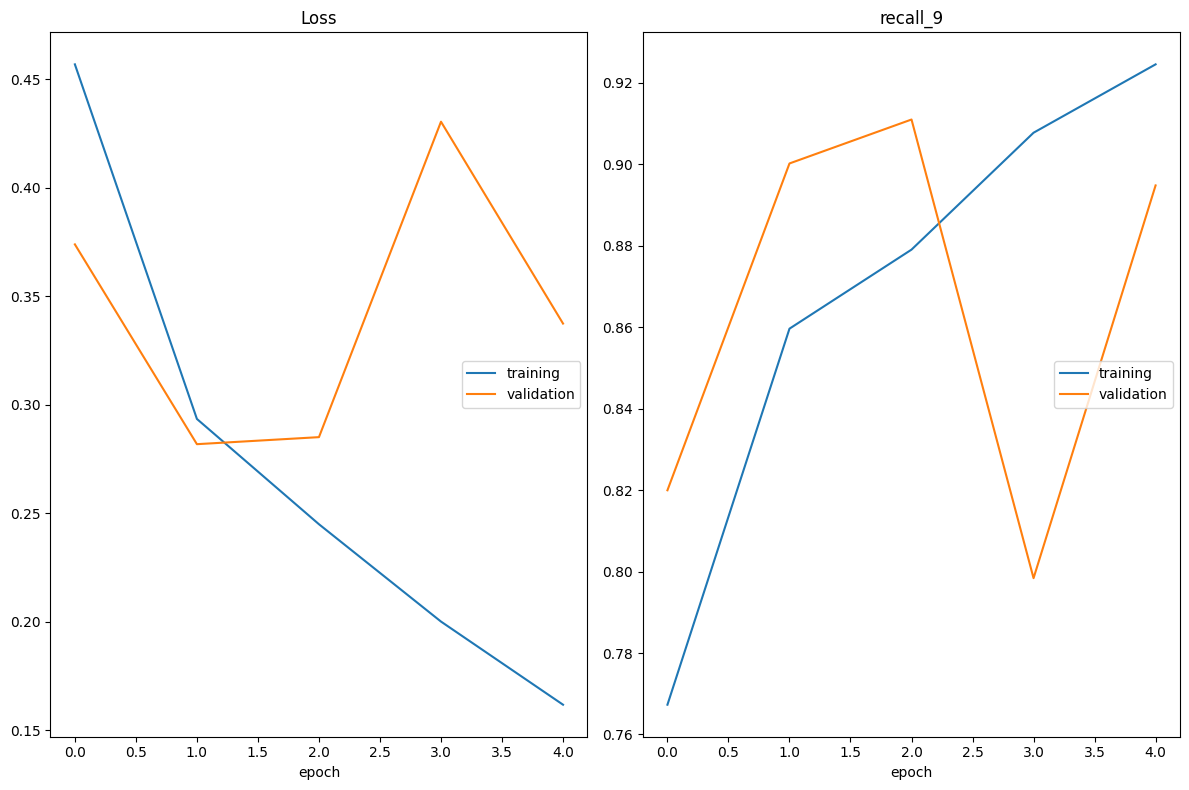

Loss
	training         	 (min:    0.162, max:    0.457, cur:    0.162)
	validation       	 (min:    0.282, max:    0.430, cur:    0.337)
recall_9
	training         	 (min:    0.767, max:    0.925, cur:    0.925)
	validation       	 (min:    0.798, max:    0.911, cur:    0.895)
Restoring model weights from the end of the best epoch: 2.
510/510 [==============================] - 22s 44ms/step - loss: 0.1618 - recall_9: 0.9245 - val_loss: 0.3374 - val_recall_9: 0.8948
Epoch 5: early stopping


In [ ]:
model_GRU.fit(X_pad, y_train, epochs=100, batch_size=32,
         validation_data=(X_pad_val, y_val), callbacks=[PlotLossesKeras(), early_stop],
         sample_weight = classes_weights)
# split to validation better than using the testing

#### Model Evaluation GRU

In [ ]:
model_GRU.evaluate(X_pad_test, y_test)
# 2nd value is recall not accuracy

142/142 [==============================] - 3s 20ms/step - loss: 0.2891 - recall_9: 0.8972


[0.28911682963371277, 0.8972214460372925]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):



    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
X_pad_test

array([[   0,    0,    0, ...,   66,    5,  207],
       [   0,    0,    0, ...,    6,   23,   58],
       [   0,    0,    2, ..., 5156, 6700,    2],
       ...,
       [   0,    0,    0, ...,  174,   45,    4],
       [   0,    0,    0, ...,  561,   37,  370],
       [   0,    0,    0, ...,    3, 1791,   21]])

In [ ]:
eval_metric(model_GRU, X_pad, y_train, X_pad_test, y_test)

142/142 [==============================] - 3s 19ms/step
Test_Set
[[ 674  146]
 [ 381 3326]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       820
           1       0.96      0.90      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.80      0.86      0.82      4527
weighted avg       0.90      0.88      0.89      4527


Train_Set
[[ 2778   174]
 [ 1113 12231]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      2952
           1       0.99      0.92      0.95     13344

    accuracy                           0.92     16296
   macro avg       0.85      0.93      0.88     16296
weighted avg       0.94      0.92      0.93     16296



142/142 [==============================] - 2s 17ms/step


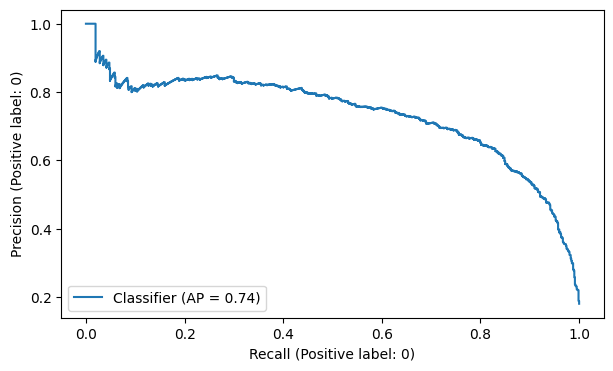

In [ ]:

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model_GRU.predict(X_pad_test)
# because the -ve class is 0 not 1 (the defualt)
y_pred_proba_0 = 1-y_pred_proba
y_pred_proba_0


PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_0,  pos_label=0)


In [ ]:
# for the comparison at the end
y_pred = model_GRU.predict(X_pad_test) > 0.5


DL_AP_GRU = average_precision_score(y_test, y_pred_proba_0,  pos_label=0)
DL_f1_GRU = f1_score(y_test, y_pred, pos_label=0)
DL_rec_GRU = recall_score(y_test, y_pred,  pos_label=0)

142/142 [==============================] - 2s 17ms/step


#### LSTM

In [ ]:
from tensorflow.keras import Sequential
model_LSTM = Sequential()

# This function represents a model where layers follow each other sequentially, meaning the outputs of one layer are fed into the next layer.
# The Sequential model includes the layers that receive inputs from the previous layer.
# Layers are added to the Sequential model using the add method.

In [ ]:
embedding_size = 50

# We specify the dimensionality/size of each vector for the tokens that we will provide to the DL model.

# Although best practice usually prefers numbers like 50, 100, 300, you can choose any number you want.
# However, the larger this number is, the higher # the computational cost will be for us.

In [ ]:
model_LSTM.add(Embedding(input_dim=num_words,            # token size (vocabulary)
                    output_dim=embedding_size,      # the vector of each token
                    input_length=max_tokens))       # the maximum number of token per wotd

# The Embedding layer is a layer used in NLP models and consists of a 3-dimensional tensor.
# The first dimension is the total number of tokens in the training set.
# The second dimension is how many tokens each document consists of (max_tokens).
# The third dimension is how many elements a word embedding for each token consists of (embedding_size).

# When converting documents to a numeric version, since the first 10,000 tokens most frequently used in the corpus are used, we make the
# input_dim=num_words adjustment to the Embedding layer so that only the first 10,000 tokens most frequently used in the corpus are used in both training and
# prediction stages.

# If you make the input_dim smaller than 10,000 (like 5,000), then the model trains and predicts using only the first 5,000 tokens most frequently
# used in the corpus.

model_LSTM.add(Dropout(0.3))

model_LSTM.add(LSTM(units=60, return_sequences=True)) #Ammar: the number of units should be logical with the max_tokens

# return_sequences=False makes the model transfer only the last time step's (t_n) hidden_state to the next layer. The default is False.

# return_sequences=True makes the model transfer all hidden_states from all time steps (like t_0, t_1, t_2 .....t_n) to the next LSTM, GRU layers.
# This way, the model tries to keep the entire sentence in mind. If an LSTM/GRU layer is followed by another LSTM/GRU layer, return_sequences should be set
# to True, otherwise the model will return an error. However, if the next layer is a dense layer, return_sequences should be set to False, otherwise
# the model will again return an error. This is because Dense layers only work with a single hidden_state.

model_LSTM.add(LSTM(units=40, return_sequences=True))
model_LSTM.add(Dropout(0.3))
# We set return_sequences=True because the next layer is a GRU layer.

model_LSTM.add(LSTM(units=25, return_sequences=False))
# We set return_sequences=False because the next layer is a Dense layer.


model_LSTM.add(Dense(1, activation='sigmoid'))  # There are 2 classes, so sigmoid is the best activation function

In [ ]:
optimizer = Adam()

In [ ]:
from tensorflow.keras.metrics import Recall

In [ ]:
model_LSTM.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=Recall(class_id=0))

# The compile is where we adjust the optimization parameters. Compile parameters include the choice of gradient descent algorithm to be used in
# the optimization processes of the DL model, the determination of the loss function, and the metrics to be followed during optimization processes.
# The details are as follows.

# loss: The loss function to be used for optimizing the model. For example, for classification: binary_crossentropy or categorical_crossentropy,
# for regression: mse, etc.
# optimizer: The optimization algorithm to be used to optimize the model's weights. For example, SGD, Adam, or RMSprop, etc.
# metrics: The metrics to be used to evaluate the model's performance. For example, accuracy, precision, or recall, etc.

In [ ]:
model_LSTM.summary()
# embedding_size * num_words ==> 50 * 10001 ==> 500050

# 3 x (n2 + nm + 2n) m= input, n= output


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 101, 50)           500050    
                                                                 
 dropout_21 (Dropout)        (None, 101, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 101, 60)           26640     
                                                                 
 lstm_14 (LSTM)              (None, 101, 40)           16160     
                                                                 
 dropout_22 (Dropout)        (None, 101, 40)           0         
                                                                 
 lstm_15 (LSTM)              (None, 25)                6600      
                                                                 
 dense_9 (Dense)             (None, 1)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1,
                           patience = 3, restore_best_weights=True)


In [ ]:
# since the data are imbalance

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061151, 2.7601626 ])

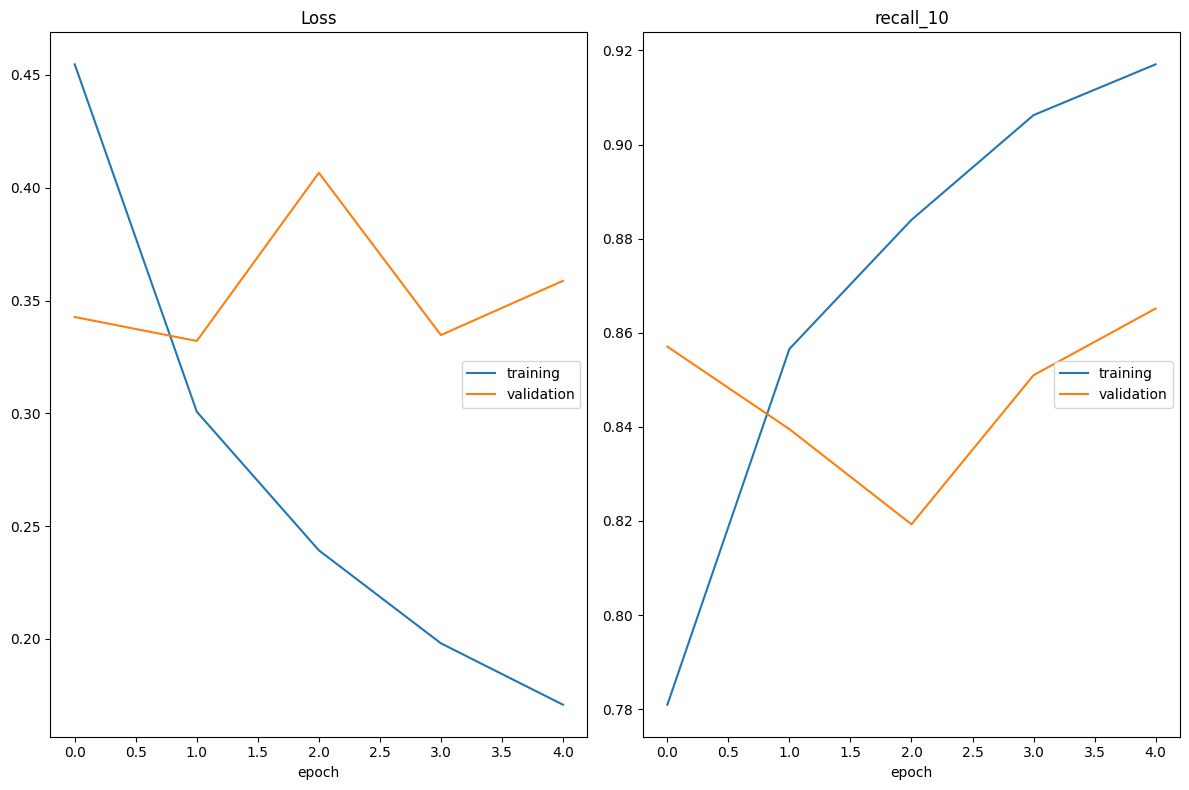

Loss
	training         	 (min:    0.171, max:    0.455, cur:    0.171)
	validation       	 (min:    0.332, max:    0.407, cur:    0.359)
recall_10
	training         	 (min:    0.781, max:    0.917, cur:    0.917)
	validation       	 (min:    0.819, max:    0.865, cur:    0.865)
Restoring model weights from the end of the best epoch: 2.
510/510 [==============================] - 20s 40ms/step - loss: 0.1709 - recall_10: 0.9170 - val_loss: 0.3588 - val_recall_10: 0.8651
Epoch 5: early stopping


In [ ]:
model_LSTM.fit(X_pad, y_train, epochs=100, batch_size=32,
         validation_data=(X_pad_val, y_val), callbacks=[PlotLossesKeras(), early_stop],
         sample_weight = classes_weights)
# split to validation better than using the testing

#### Model Evaluation LSTM

In [ ]:
model_LSTM.evaluate(X_pad_test, y_test)
# 2nd value is recall not accuracy

142/142 [==============================] - 2s 17ms/step - loss: 0.3400 - recall_10: 0.8384


[0.3400021493434906, 0.8384138345718384]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):



    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(model_LSTM, X_pad, y_train, X_pad_test, y_test)

142/142 [==============================] - 3s 18ms/step
Test_Set
[[ 723   97]
 [ 599 3108]]
              precision    recall  f1-score   support

           0       0.55      0.88      0.68       820
           1       0.97      0.84      0.90      3707

    accuracy                           0.85      4527
   macro avg       0.76      0.86      0.79      4527
weighted avg       0.89      0.85      0.86      4527


Train_Set
[[ 2863    89]
 [ 1759 11585]]
              precision    recall  f1-score   support

           0       0.62      0.97      0.76      2952
           1       0.99      0.87      0.93     13344

    accuracy                           0.89     16296
   macro avg       0.81      0.92      0.84     16296
weighted avg       0.92      0.89      0.90     16296



142/142 [==============================] - 2s 16ms/step


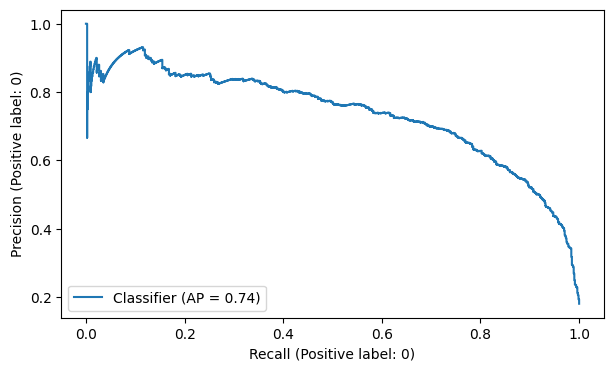

In [ ]:

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model_LSTM.predict(X_pad_test)
# because the -ve class is 0 not 1 (the defualt)
y_pred_proba_0 = 1-y_pred_proba
y_pred_proba_0

b
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_0,  pos_label=0)


In [ ]:
# for the comparison at the end
y_pred = model_LSTM.predict(X_pad_test) > 0.5


DL_AP_LSTM = average_precision_score(y_test, y_pred_proba_0,  pos_label=0)
DL_f1_LSTM = f1_score(y_test, y_pred, pos_label=0)
DL_rec_LSTM = recall_score(y_test, y_pred,  pos_label=0)

142/142 [==============================] - 3s 20ms/step


## BERT Modeling

In [28]:
# # To find pre-trained models like BERT

# !pip install transformers
# #To use BERT models, we first need to install transformers as BERT models are built on top of transformers.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.8 MB/s eta 0:00:00


### Read Data

Already done

### Train test split

aleady done

### Tokenization

In [29]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # model name in huggface
# We will always use the uncased model for classification and sentiment analysis problems.

In [30]:
print(len(tokenizer.vocab))

# There are 30522 unique tokens in BERT uncased model

30522


In [31]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused0]', 1),
             ('[unused1]', 2),
             ('[unused2]', 3),
             ('[unused3]', 4),
             ('[unused4]', 5),
             ('[unused5]', 6),
             ('[unused6]', 7),
             ('[unused7]', 8),
             ('[unused8]', 9),
             ('[unused9]', 10),
             ('[unused10]', 11),
             ('[unused11]', 12),
             ('[unused12]', 13),
             ('[unused13]', 14),
             ('[unused14]', 15),
             ('[unused15]', 16),
             ('[unused16]', 17),
             ('[unused17]', 18),
             ('[unused18]', 19),
             ('[unused19]', 20),
             ('[unused20]', 21),
             ('[unused21]', 22),
             ('[unused22]', 23),
             ('[unused23]', 24),
             ('[unused24]', 25),
             ('[unused25]', 26),
             ('[unused26]', 27),
             ('[unused27]', 28),
             ('[unused28]', 29),
             ('[unused29]', 30),
  

Example to explain the process

In [32]:
text = "Careless driver and student ended up with some hospitalization 🏥."
print(tokenizer.tokenize(text))

# An example of word piece tokenization according to cased tokenization
# [UNK] is the special token used in BERT tokenization to represent unknown tokens.
# [UNK] token has been assigned for the hospital emoji


['careless', 'driver', 'and', 'student', 'ended', 'up', 'with', 'some', 'hospital', '##ization', '[UNK]', '.']


In [33]:
def search_vocab(tokenizer, index):
  """Searches for the token corresponding to the given index in the BERT tokenizer vocabulary.

  Args:
    tokenizer: A BERTTokenizer instance.
    index: The index of the token to search for.

  Returns:
    The token corresponding to the given index in the BERT tokenizer vocabulary.
  """

  for token, token_index in tokenizer.vocab.items():
    if token_index == index:
      return token
  return None

In [34]:

# Example usage:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
index = 2902

token = search_vocab(tokenizer, index)

print(token)

hospital


In [35]:
input_ids = tokenizer.encode(text, add_special_tokens=True) # default add_special_tokens=True
print(input_ids)

# tokenizer.encode(text, add_special_tokens=True)" returns input_ids by adding special tokens at the beginning and end of the text.


#The output of tokenizer.encode() is a list of integer indices, where each integer index represents a token in the BERT vocabulary.
#The special tokens [CLS] and [SEP] are added to the beginning and end of the input sequence, respectively.
# because BERT expects the input sequence to start with the [CLS] token and end with the [SEP] token.


#  [CLS] (token index 101): This token is added to the beginning of every input sequence to signal to the model that the sequence is starting.
#  23358: This token represents the word "careless".
#  ...
#  ...
#  2902: This token represents the word "hospital".
#  3989: This token represents the word "##ization".
#  100: This token represents '[UNK]'
#  1012: This token represents the word ".".
#  [SEP] (token index 102): This token is added to the end of every input sequence to signal to the model that the sequence is ending.

[101, 23358, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 100, 1012, 102]


In [36]:
print(tokenizer.convert_tokens_to_ids(['Care', '##less', 'driver', 'and', 'student', 'ended', 'up', 'with', 'some', 'hospital', '##ization', '.']))

# convert_tokens_to_ids" converts the tokens into token numbers in the memory of the BERT model.

[100, 3238, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 1012]


In [37]:
print(tokenizer.convert_tokens_to_string(['Care', '##less', 'driver', 'and', 'student', 'ended', 'up', 'with', 'some', 'hospital', '##ization', '.']))

# convert_tokens_to_string" converts the tokens into a text (string) by concatenating them

Careless driver and student ended up with some hospitalization .


In [38]:
tokenizer.decode(input_ids)

# The 'decode' code is used to convert numeric tokens given as 'input_ids' into text.
# This process allows for the conversion of numeric tokens back into their original text form.

'[CLS] careless driver and student ended up with some hospitalization [UNK]. [SEP]'

In [39]:
text = "Careless driver and student ended up with some hospitalization 🏥."
input_ids = tokenizer.encode(text, add_special_tokens=True) # default add_special_tokens=True
print(input_ids)
print(tokenizer.encode_plus(text, add_special_tokens=True)) # default add_special_tokens=True

# tokenizer.encode(text, add_special_tokens=True)" returns input_ids by adding special tokens at the beginning and end of the text.
# The code "tokenizer.encode_plus(text, add_special_tokens=True)" converts the text into three separate vectors: input_ids, token_type_ids, and
# attention_mask.

# The tokenizer.encode function converts our text into a numeric version, similar to how it is done in DL models.
# Special tokens indicating the start-[CLS] and end-[SEP] points of the sentence/text are added to each text.

# The numeric version of the text, which is converted into token embeddings vectors, is called input_ids in BERT models.

# However, BERT models do not only require the token embeddings (input_ids) vector as input.They require three separate vectors:
# - token embeddings (input_ids),
# - segment embeddings (token_type_ids)
# - attention_mask

# Token embeddings convert the tokens into numeric form based on their position in the BERT model's memory,
# similar to how it is done in DL models.

# Segment embeddings are used in tasks such as translation, question-answering, and sentence similarity.
# For example, in a translation task, the model needs to understand which part of the text is in Turkish and which part is in English,
#  it helps the model establish semantic relationships between tokens in these two different text structures.
# The Turkish part is represented by 0s, while the English part is represented by 1s (or vice versa).

# Position embeddings provide the model with information about the position of tokens in the text. This allows the model to establish semantic
# relationships based on the order of tokens. (beucase it works in Parallel, all inputs will be inserted at ones)

# The position embedding vector is not a separate vector like the others mentioned above.
# It is added to the word embedding vectors of tokens in the text.
# By doing so, the model learns the order of tokens while reading their word embeddings.

# The attention_mask provides information to the model about which tokens to process.
#The model performs operations only on tokens with a value of 1,
# while tokens with a value of 0 are not processed. ( represnts Padding)

# However, segment embeddings are not used in tasks such as classification, sentiment analysis, and named entity recognition (NER).

[101, 23358, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 100, 1012, 102]
{'input_ids': [101, 23358, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 100, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [40]:
tokenizer.encode_plus(text).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [41]:
# you can print just one of them

print(tokenizer.encode_plus(text)['input_ids'])

[101, 23358, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 100, 1012, 102]


### Fixing token counts of all documents

We can't use the same as DL model, since the tokenizaion is differnet

In [42]:
# For every sentence...
number_tokens_sentences = []
for sent in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

# We will use the 'tokenizer.encode()' function to find out how many tokens the longest comment consists of and to decide on the number
# of tokens to fix for all documents/texts.

Max sentence length:  154


In [43]:
np.array(number_tokens_sentences).mean()

76.81983308787433

In [44]:
token_size = 140
summy = sum(np.array(number_tokens_sentences) < token_size) / len(number_tokens_sentences)

# We will fix all documents to size 140

In [45]:
print(summy," of the sentences will not lose any information when the token size is fixed as", token_size)

0.9950294550810015  of the sentences will not lose any information when the token size is fixed as 140


In [46]:
max_tokens = token_size

### Transformation Vectors to Matrices

In [47]:
text = "Careless driver and student ended up with some hospitalization 🏥."
tokens = tokenizer.encode_plus(text, add_special_tokens=True)
print(tokens)

# The "tokenizer.encode_plus()" function converts the text into token embeddings (input_ids), segment embeddings (token_type_ids), and attention_mask
# vectors as required by BERT models.

# Similar to what we did in "tokenizer.encode()", special tokens indicating the start-[CLS] and end-[SEP] points of the sentence/text are added to each
# text here as well.

# IMPORTANT NOTE: Only embeddings (input_ids) and attention_mask are used in BERT classification, sentiment analysis, and Named Entity
# Recognition (NER) tasks.

{'input_ids': [101, 23358, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 100, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


- 'token_type_ids' no need, we have only one sentence (one query) not a question answering
- k': [1, 1, ... , 1]}  becuase we did not add padding yet (so no zeros yet)

In [48]:
tokens = tokenizer.encode_plus(text, max_length=token_size, truncation=True,
                              padding='max_length', add_special_tokens=True)
# if a sentence is less than 24 token, it wil lbe filled by 0s
tokens

# Since we decided to fix the texts to 140 tokens, we perform truncation (truncation=True) and padding (padding='max_length') operations to all texts to
# be 140 tokens by giving max_length=140, truncation=True, padding='max_length' parameters inside the tokenizer.encode_plus() function.
#The point we need to pay attention to here is that we are not using padding = True, instead we use padding='max_length

# Also, texts will be fixed to 140 tokens with the addition of [CLS] and [SEP] special tokens.

# As you can see, all three vectors are fixed to 140 tokens.
# We do not forget that in classification problems, segment embeddings (token_type_ids) will be a vector consisting only of zeros, so they are not used in classification problems

{'input_ids': [101, 23358, 4062, 1998, 3076, 3092, 2039, 2007, 2070, 2902, 3989, 100, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

We will convert the follwoing into numpy arrays :
1. token embeddings (input_ids)
2. attention_mask

- segment embeddings ('token_type_ids') no need, we have only one sentence (one query) not a question answering

In [49]:
# convert it into numpy array
np.array(tokens["input_ids"])

array([  101, 23358,  4062,  1998,  3076,  3092,  2039,  2007,  2070,
        2902,  3989,   100,  1012,   102,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [50]:
# convert it into numpy array
np.array(tokens["attention_mask"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
# Since our task is classification, we need to obtain two separate matrices consisting of the following two vectors:
# - token embeddings (input_ids)
# - attention_mask .

# For this,:
#    1. we first create empty lists for input_ids and attention_mask,
#    2. then pull all rows/documents from X one by one with a for loop and append :
           # the input_ids
           # attention_mask vectors
     #we obtained from these documents into the empty lists
#    3. In the final step, we convert these lists into matrices of size:
           # (number of rows, fixed token number) --> (len(X), 140) with the array() function.

def transformation(X):
  # set array dimensions
  seq_len = token_size

  # We create an empty list Xids for input_ids vectors and an empty list Xmask for attention_mask vectors.
  Xids = []
  Xmask = []


  for text in X: # We are pulling all lines/documents from the corpus in order.

      tokens = tokenizer.encode_plus(text, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # We are converting each text we pull from the corpus into vectors.

      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids'])       # We are appending the input_ids vector corresponding to each line/document to the Xids list.
      Xmask.append(tokens['attention_mask']) # We are appending the attention_mask vector corresponding to each line/document to the Xmask list.


  return np.array(Xids), np.array(Xmask) # We are converting the Xids and Xmask matrices (row number, 24) into array format for faster operation.

In [52]:
Xids_train, Xmask_train = transformation(X_train)
# We are creating 2 separate matrices for our training set.

Xids_val, Xmask_val = transformation(X_val)
# We are creating 2 separate matrices for our validation set.

Xids_test, Xmask_test = transformation(X_test)
# We are creating 2 separate matrices for our test set.

In [53]:
Xids_train

array([[ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 3407, 2000, ...,    0,    0,    0],
       [ 101, 1045, 2288, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 2043, 2122, ...,    0,    0,    0]])

In [54]:
Xmask_train

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [55]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (16296, 140)
Xmask_train.shape : (16296, 140)
Xids_test.shape   : (4527, 140)
Xmask_test.shape  : (4527, 140)


In [56]:
y_train

9032     1
16056    1
16061    1
9398     0
8342     1
        ..
14800    1
18102    1
5840     1
13229    1
2848     0
Name: target, Length: 16296, dtype: int64

### Transformation Matrix to Tensorflow tensor

- To use TBU, we need to convert our data into tesnros
- Tensors are jsut supported by Google (e.g. colab)

In [57]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_train))
dataset_train

# The final step before feeding the data into BERT models is to convert the matrices we obtained above into grouped TensorFlow tensors.

# A tensor is a mathematical structure that represents a collection of data in one or more dimensions.
  ##  A one-dimensional tensor is represented as a vector,
  ##  a two-dimensional tensor as a matrix
  ##  tensors with three or more dimensions are referred to as high-dimensional tensors.

# TensorFlow tensors enable faster execution on hardware such as GPUs/TPUs and allow for more efficient processing of operations such as parallel computing.

# TensorFlow tensors can also utilize the automatic differentiation features provided by the TensorFlow library.
# However, numpy.array() cannot perform these operations, so we convert them to tensors using the TensorFlow library.

# Additionally, the tf.data.Dataset.from_tensor_slices function converts the Xids_train, Xmask_train, and y_train tensors into triple grouped tensors.
# This way, the model will understand that these three tensors represent a single row.

# In this context, we will convert our three separate matrices obtained for the training data into grouped TensorFlow tensors.


<_TensorSliceDataset element_spec=(TensorSpec(shape=(140,), dtype=tf.int64, name=None), TensorSpec(shape=(140,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [58]:
dataset_val = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, y_val))
dataset_val

#We convert the tensors Xids_train, Xmask_train, and labels_train into triple grouped tensors, just like we did with the training data.


<_TensorSliceDataset element_spec=(TensorSpec(shape=(140,), dtype=tf.int64, name=None), TensorSpec(shape=(140,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [59]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test))
dataset_test

#We convert the tensors Xids_train, Xmask_train, and labels_train into triple grouped tensors, just like we did with the training data.


<_TensorSliceDataset element_spec=(TensorSpec(shape=(140,), dtype=tf.int64, name=None), TensorSpec(shape=(140,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [60]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

# Which of the tensors we obtained above is 'input_ids', which is 'attention_mask', and which is 'labels' the model does not know.
# Therefore, we need to provide this information to our model.
# We define the map_func function for this purpose.

# We define 'input_ids' and 'attention_mask' within the dictionary. We leave the labels (y's) outside the dictionary.

In [61]:
dataset_train = dataset_train.map(map_func)
dataset_val = dataset_val.map(map_func)
dataset_test = dataset_test.map(map_func)

# then we use the dataset map method to apply this transformation

In [62]:
# Check
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(140,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(140,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Batch Size

In [72]:
batch_size = 16

# The developers who developed the BERT model recommend using batch sizes of 16 and 32.

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_val.batch(batch_size)
test_ds = dataset_test.batch(batch_size)

# We determine in how many batches we will feed the grouped tensors obtained above to the model. We do this using the batch() function.
# We want the model to be fed in batches of 16. We apply this to both the train and test data.

# We determine in how many batches we will feed the grouped tensors obtained above to the model. We do this using the batch() function.
# We want the model to be fed in batches of 16. We apply this to both the train and test data.

### Creating optimization

In [64]:
!pip install -q tf-models-official   # because we will use custimize optimizer (it is recomended for BERT)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00


In [65]:
from official.nlp import optimization
epochs = 13
#batch_size = 16
steps_per_epoch = len(train_ds)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

# The Num_warmup_steps (warm-up step count) determines how the learning rate of the optimizer to be used in the training process of a model in
# an optimization process will be determined. The learning rate determines how fast the model will learn and update during the training process.
# A very high learning rate can cause the model to learn quickly during the training process, but it can also increase the risk of overfitting
# the model. A very low learning rate can cause the model to fail to learn.

# Num_warmup_steps ensures that the learning rate of the optimizer in the training process of the model is low at the beginning of the training
# process and gradually increases as the training process progresses. This way, there is a lower risk of the model making mistakes at a lower rate
# during the training process and the training process of the model progresses more regularly. This allows the model to perform better.


# steps_per_epoch shows how many steps an epoch will be completed. len(train_ds) = 1019 --> len(train_ds) number shows how many 16-piece packets/steps
# the train_data consists of.

# IMPORTANT NOTE: The last packets/steps in the train data may consist of less than 16 observations. For example, there are 10 observations in the last
# packet/step of this train_ds data. However, even if there are less than 16 observations, we still count them as a packet/step.

# num_train_steps shows how many steps the training will be completed in total. Since the training will be completed in 3 epochs,
# steps_per_epoch(len(train_ds)) * epochs --> 1019 * 3 = 3057, num_warmup_steps is recommended to be taken as 10% of num_train_steps (3057*.1 = 306).
# However, you can observe your scores by reducing/increasing this rate a little more. The fact that num_warmup_steps is 240 means the following.
# When the model starts training, it does not start training directly with the learning rate of 2e-5 that we gave into the optimization.create_optimizer
# function.
# In the first 306 steps of the training, the learning rate is gradually increased to be between 0 and 2e-5, and after the 306th step, the training
# continues at a rate of 2e-5.
# This way, there is a lower risk of the model making mistakes at a lower rate during the training process and the training process of the model
# progresses more regularly. This allows the model to perform better.

# If you notice, we used the AdamW (Adam with Weight Decay) optimizer here. AdamW includes the weight decay feature in addition to the Adam optimizer.

# Weight decay allows the weights of the model to change less during the training process, thereby reducing the risk of overfitting.

# The learning rates recommended by developers in BERT models are 2e-5, 3e-5 and 5e-5.
# The number of epochs recommended by developers in BERT models is 2 or 3. Larger numbers cause overfitting.
# We need to observe by trial and error which learning rates and epoch numbers give better results.

### Creating Model with TPU

In [66]:
def create_model():
    from transformers import TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFBertModel.from_pretrained("bert-base-uncased")
    # We are copying the necessary code for model training from the Hugging Face page.
    # Since tokenization is done with "bert-base-uncased", we need to train with "bert-base-uncased" as well.
    # If we train with "bert-base-cased", our results will be poor.

    input_ids = Input(shape=(token_size,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(token_size,), name='attention_mask', dtype='int32')
    # Since our inputs consist of token embeddings (input_ids) and position embeddings (attention_mask), we create an input layer for each of them.
    # Since input_ids and attention_mask have a size of 24, we specify the dimensions of our input layers as (shape=(24,)) for each document/row.
    # Otherwise, we would get an error.

    # To distinguish these layers from each other, we use the names we specified in the map_func function as the names. If different names are used,
    # the model will return an error.
    # BERT models work with dtype="int32". Therefore, we specify dtype="int32". If a different type is used, we will get an error.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # he embeddings layer is the layer where we retrieve the word embeddings that have been previously trained and stored in the memory of the BERT model.
    # The retrieved word embeddings are then combined to convert them into sentence embeddings of size 768.
    # We will perform our training on the Dense layer to determine which class the obtained sentence embeddings belong to.

    x = Dense(160, activation='relu')(embeddings) # We are reducing the dimensionality from 768 to 160. We need to experiment to find the best number.
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x) # The recommended ratio by developers is 0.1.
    y = Dense(1, activation='sigmoid', name='outputs')(x) # Returning the output

    #Functional API
    # If you noticed, here we are using the Functional API instead of the Sequential API.
    # In the Functional API, we transfer the information from the previous layer to the next layer by opening a tuple after the layer we want to
    # transfer and writing the name of the previous layer inside it.
    # To send the sentence embeddings obtained from the Embeddings layer to the Dense layer, we open a tuple after the Dense() layer and write
    # the name of the previous layer inside it.
    # Just like here, "Dense(160, activation='relu')(embeddings)". This way, the information from the embeddings layer is transferred to the Dense layer.
    # If you remember, this process was done as model.add(embeddings) in the Sequential API.

    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # In the final stage, the inputs and outputs we obtained are defined within the Model function.

# The reason for building the model within a function is to make the operations we will perform under the strategy.scope() appear more concise.
# Otherwise, we would have to write all the code here under the strategy.scope().

In [67]:
# We define all the operations we want to perform using the speed of the 8 TPU cores assigned to the strategy variable under the code block
# with strategy.scope()

with strategy.scope():


  optimizer = optimizer
  #optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) ==> If we did not use the optimizer we defined above, we could also define
  # the optimizer in this way. However, there is a high risk of overfitting.
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics="Recall")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# with strategy.scope():

#   #from tensorflow.keras.optimizers import Adam
#   #from tensorflow.keras.losses import BinaryCrossentropy
#   #from tensorflow.keras.metrics import Recall

#   #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
#   loss = tf.keras.losses.BinaryCrossentropy()
#   recall = tf.keras.metrics.Recall()
#   model3 = create_model()
#   model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

In [68]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 140)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 140)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 140,                                           

### Model Fiting

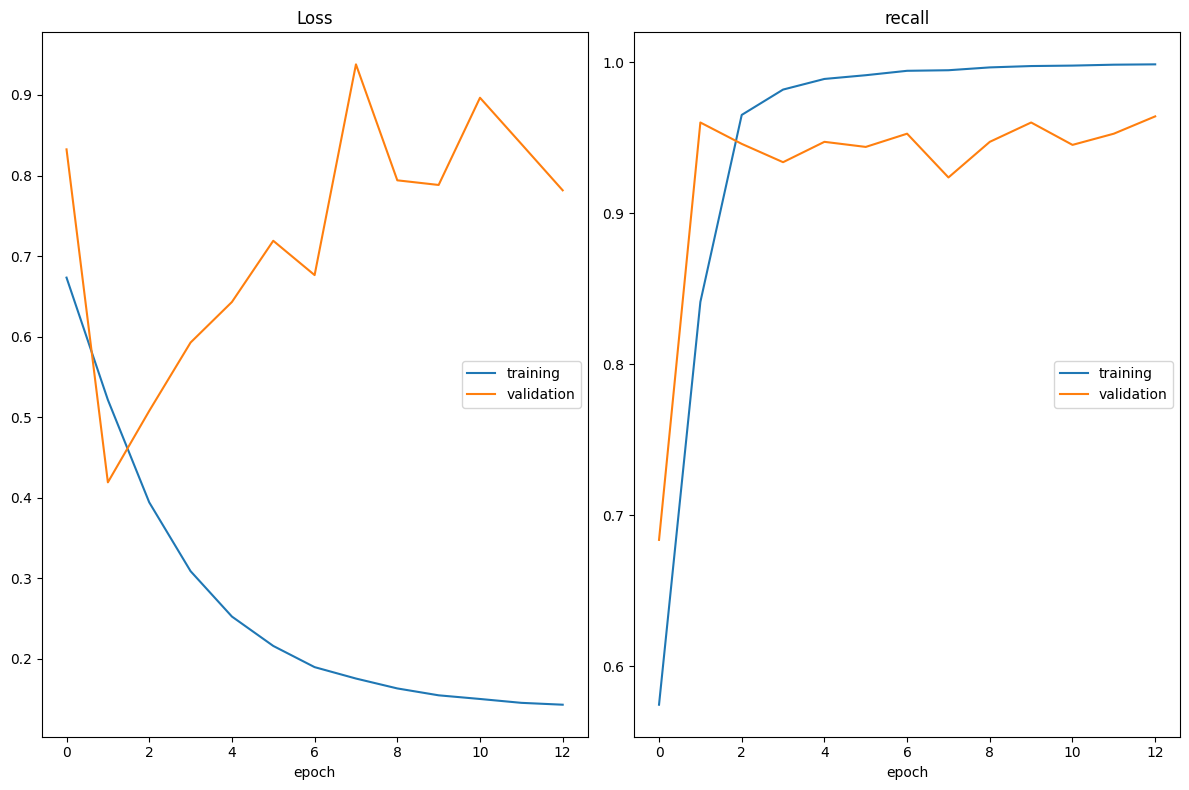

Loss
	training         	 (min:    0.143, max:    0.673, cur:    0.143)
	validation       	 (min:    0.419, max:    0.938, cur:    0.782)
recall
	training         	 (min:    0.575, max:    0.999, cur:    0.999)
	validation       	 (min:    0.684, max:    0.964, cur:    0.964)
1019/1019 [==============================] - 83s 82ms/step - loss: 0.1432 - recall: 0.9987 - val_loss: 0.7816 - val_recall: 0.9643


In [69]:

#os.environ['TF_ENABLE_EAGER_CLIENT_STREAMING_ENQUEUE'] = 'False'
model3.fit(train_ds, validation_data= val_ds, epochs=epochs,  callbacks=PlotLossesKeras())

### Model evaluation

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(test_ds) >= 0.5


print(classification_report(y_test, y_pred))



283/283 [==============================] - 8s 22ms/step
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       820
           1       0.94      0.96      0.95      3707

    accuracy                           0.92      4527
   macro avg       0.87      0.84      0.85      4527
weighted avg       0.91      0.92      0.91      4527



In [75]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred))

1019/1019 [==============================] - 24s 20ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2952
           1       0.99      1.00      0.99     13344

    accuracy                           0.99     16296
   macro avg       0.99      0.97      0.98     16296
weighted avg       0.99      0.99      0.99     16296



283/283 [==============================] - 11s 29ms/step


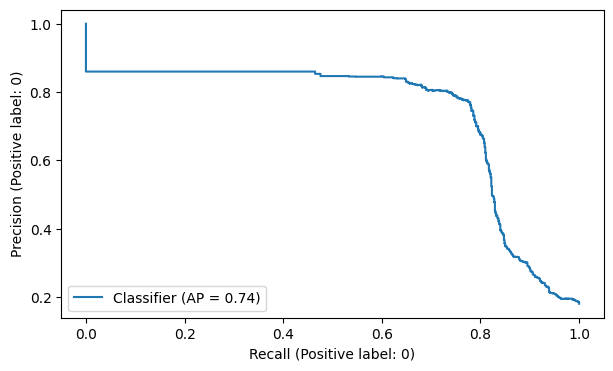

In [79]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

y_pred_proba = 1 -  model3.predict(test_ds)
# to get class 0 not class 1  probabilties

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba,  pos_label=0) # to get class 0 not class 1

### Compare Models F1 Scores, Recall Scores and Average Precision Score

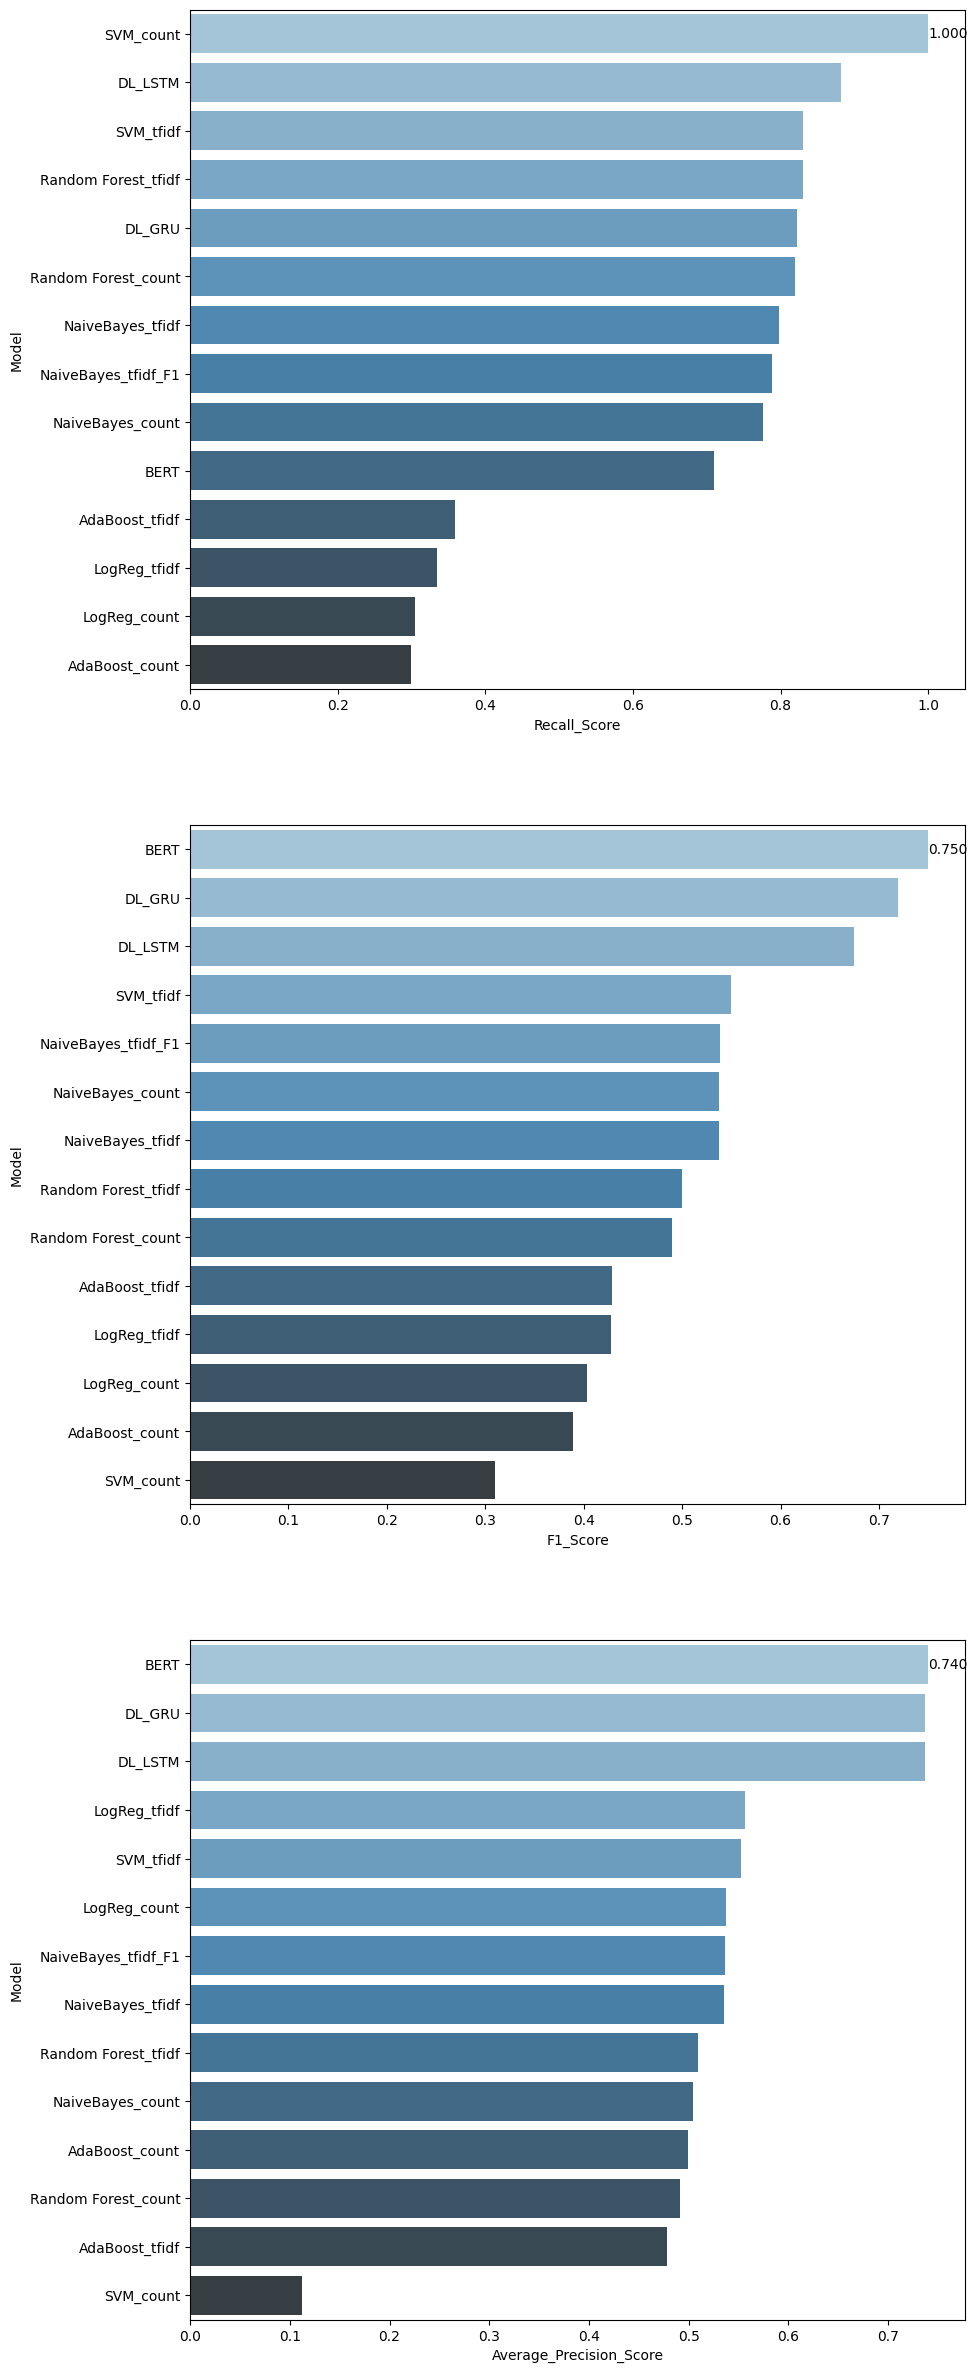

In [3]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})

plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

**Recall:**

1. For ML models: two types of vectorizers has been used: count vectorizer &  TF-IDF vectorizer
For each vectorizer, 5 algorithms have been used which are: Logistic Regression, Naïve Bayes, Support Vector Machine, Random Forest, Ada boost. **Grid Search was used for all of them to get a fair comparison**
2. Two more models have been built, deep learning GRU & LSTM models. For these, Keras tokenizer has been used, with filtering of punctual & numbers along with lowering the letters. However, no normalization has been used. For the deep learning models, fixed number of tokens for each review was needed, so the choosing process was based on that at least 95% of the reviews are with full information without truncations. Also, GRU & LSTM needed embedding size which represents the size of the vector that represent each token 50 was used. We noticed in these two models that the overfit directly which indicates that maybe batch normalization is needed since the dropout is used already.
3. BERT model also was used. For BERT, TPU from  Google Colab was used

**Conclusion**
1. BERT and GRU gave great results for all the three metrics for the negative reviews.
2. SVM ML model gave good results when the objective was set to be F1 of class 0, when it was Recall, it was focusing on the recall too much so gave bad precision & F1
3. Overall in Ml models, we can conclude that there is no difference between two two vectorizors (COUNT & TF-IDF)
4. There was some  overfitting in BERT, so early stopping may be used to prevent that
5. For GRU & LSTM, Optuna can be used to try different number of layers, units, dropouts rates, etc for getting better results

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___